In [6]:
import numpy as np
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from utils import plot_2d_visualization, plot_imgs_on_points, plot_multiple_2d_visualizations
from sammon import sammon
from data_loader import load_data

np.random.seed(0)

# Experiment 1: Reproduce the results of the paper

## MNIST

In [7]:
classes = [i for i in range(10)]
X_mnist_subset, y_mnist_subset = load_data('mnist', save_if_not_found=True, classes=classes, samples_per_class=600)
X_mnist, y_mnist = load_data('mnist')

pca = PCA(n_components=30)
X_mnist_pca = pca.fit_transform(X_mnist_subset)

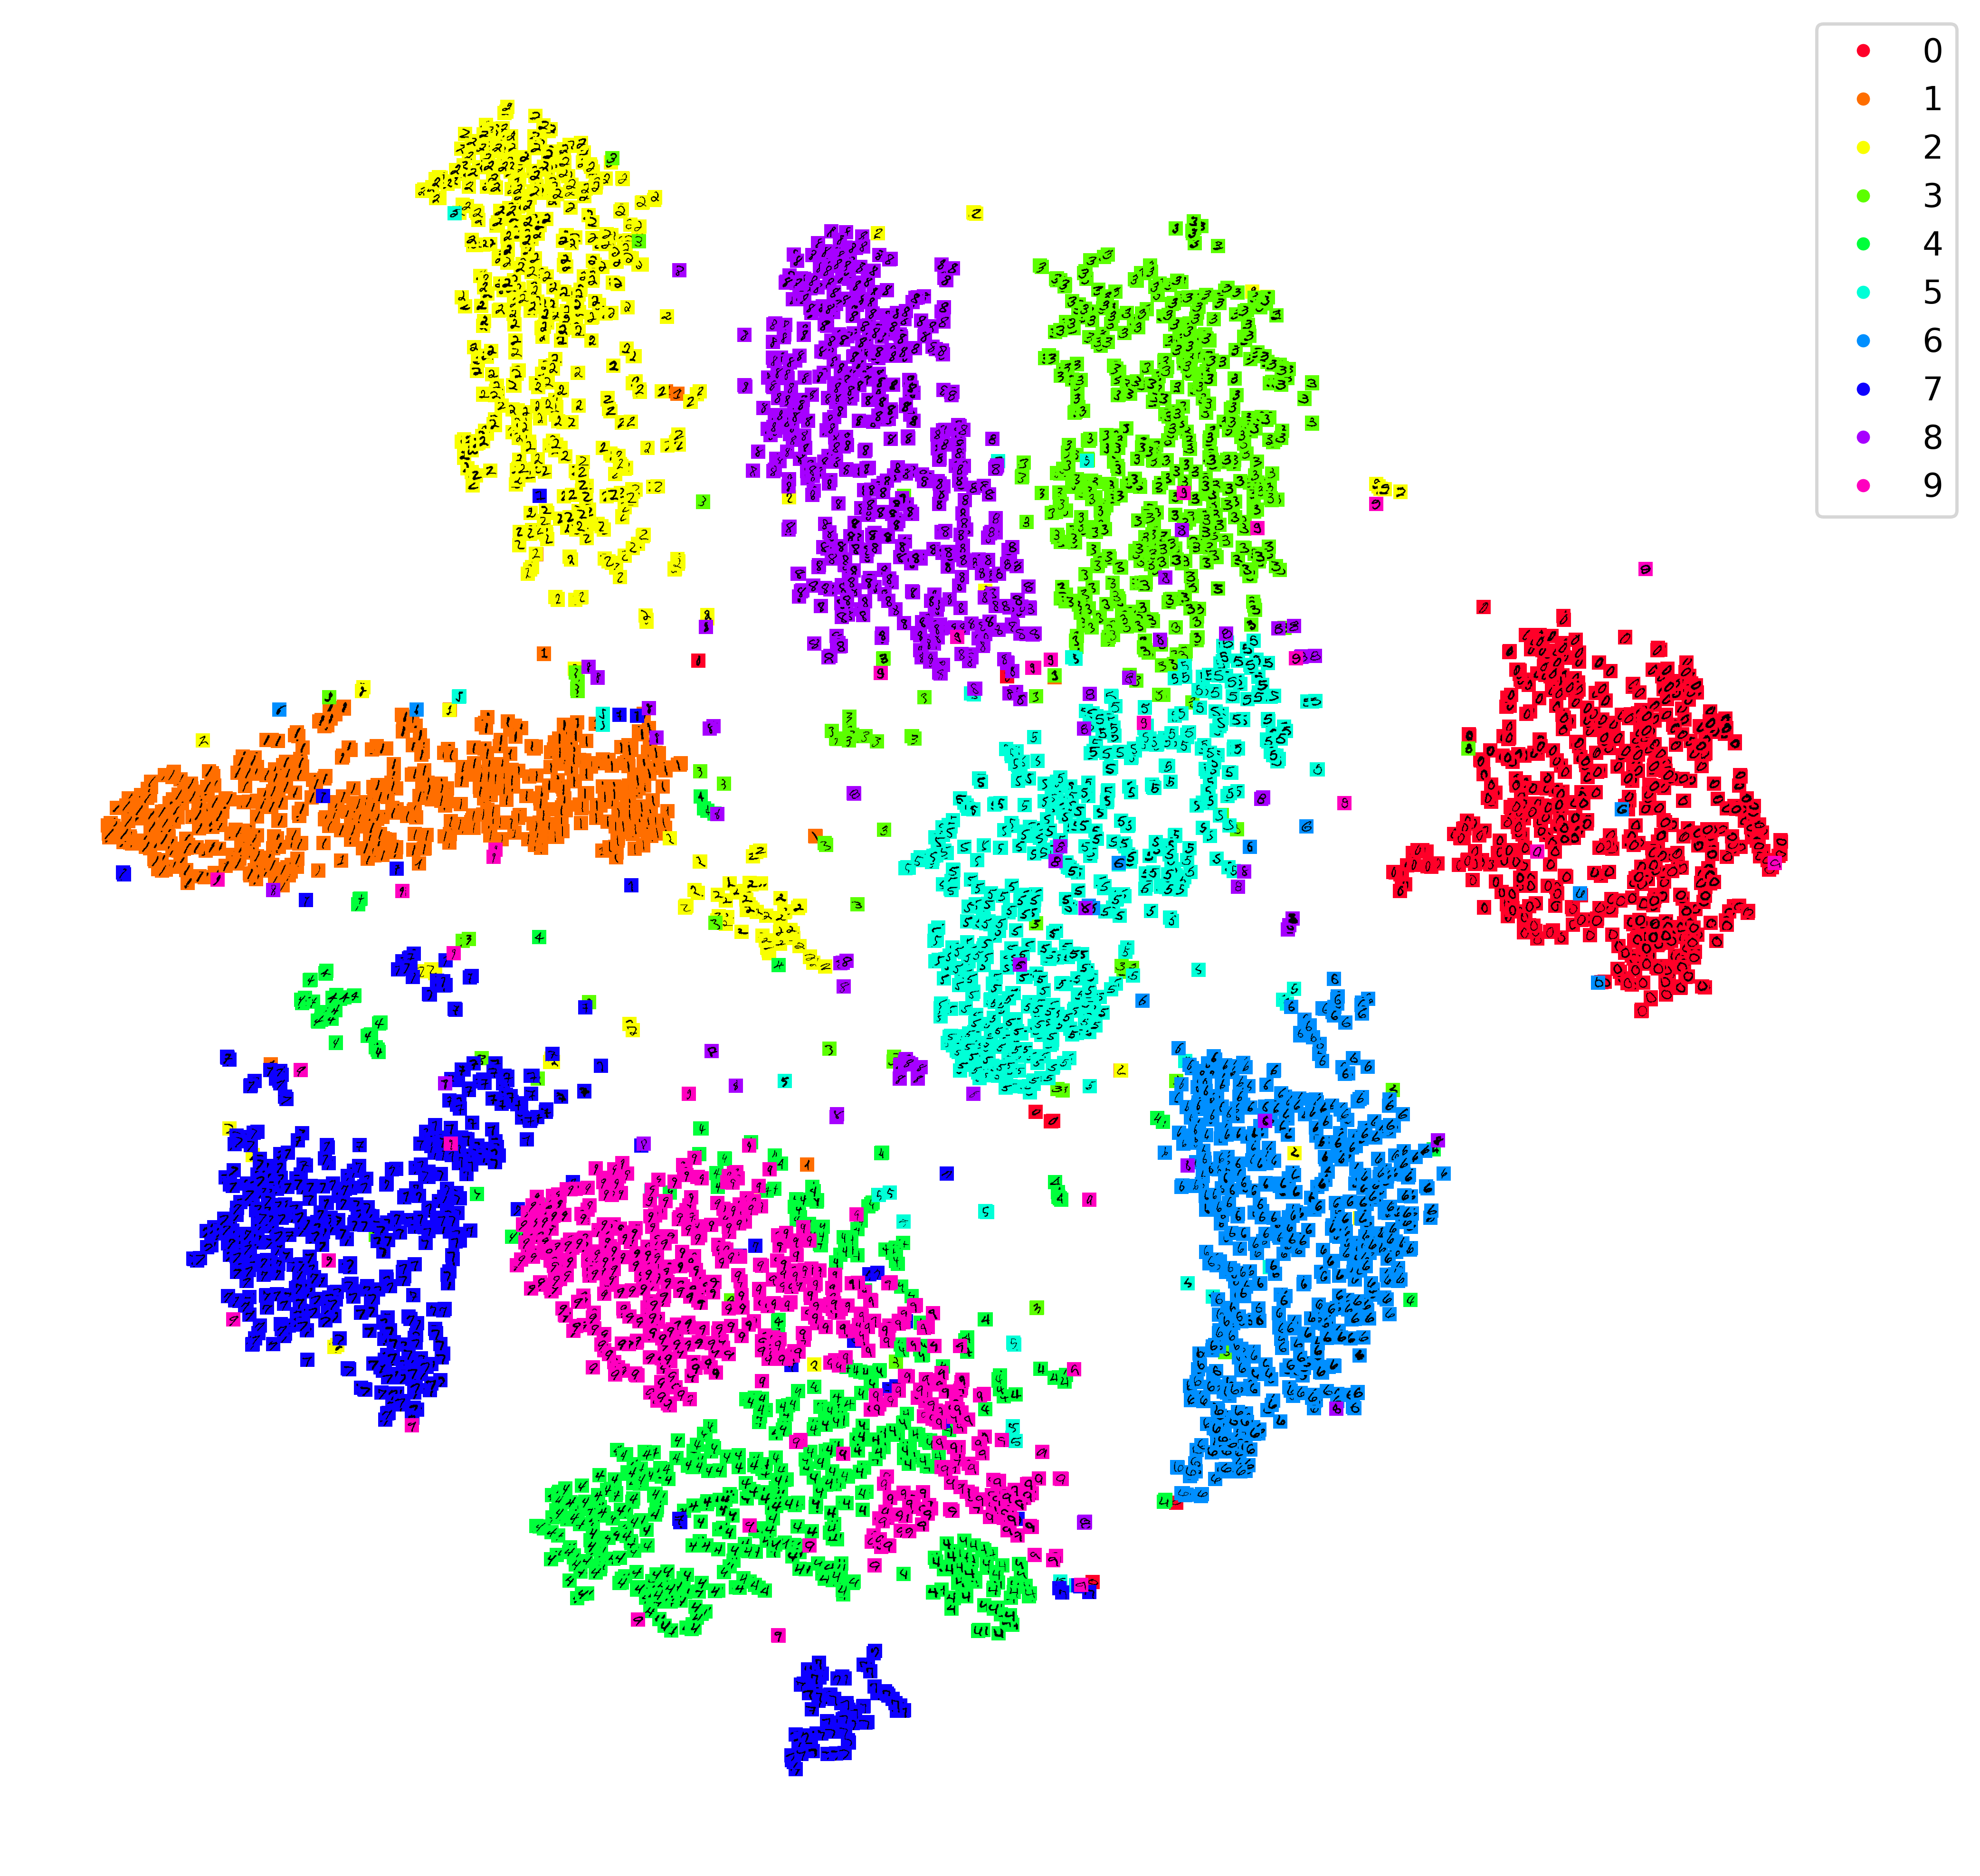

In [8]:
tsne = TSNE(n_components=2, perplexity=40)
X_mnist_tsne = tsne.fit_transform(X_mnist_pca)

#plot_2d_visualization(X_tsne, y_subset, figsize=(10, 10))
plot_imgs_on_points(X_mnist_subset, X_mnist_tsne, y_mnist_subset, figsize=(10, 10), dpi=500)

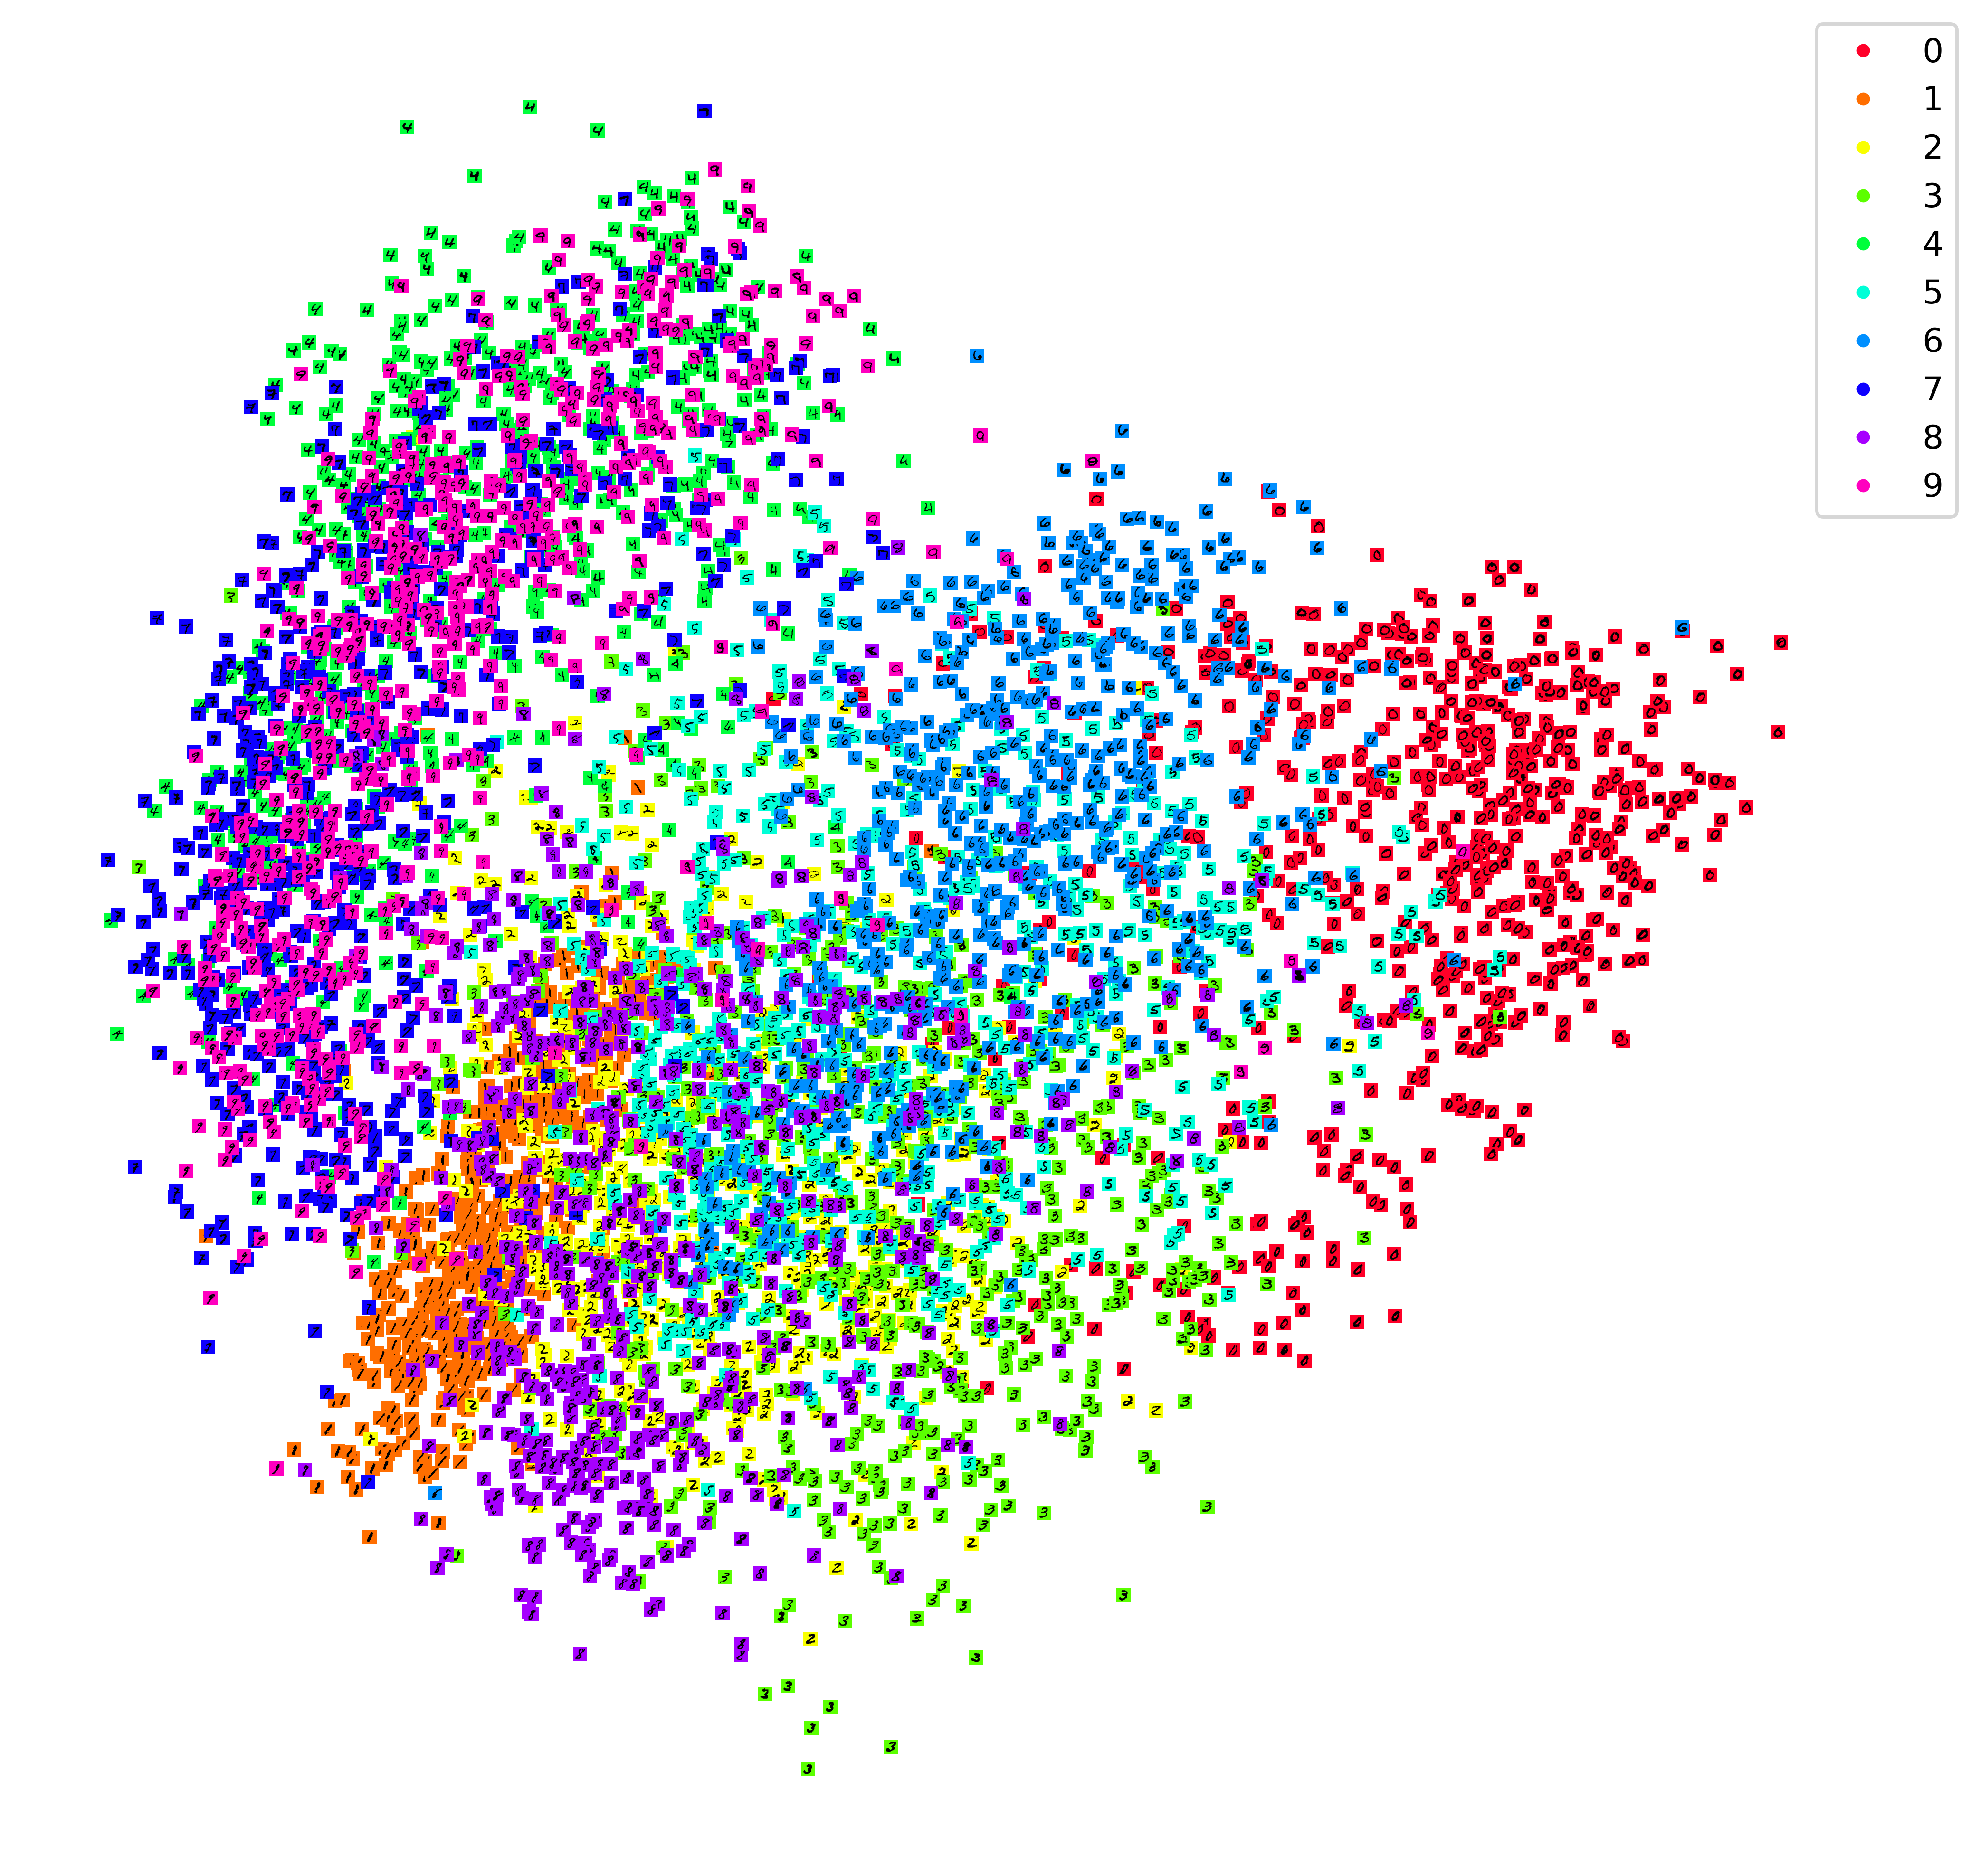

In [31]:
isomap = Isomap(n_components=2, n_neighbors=12)
X_mnist_isomap = isomap.fit_transform(X_mnist_pca)

#plot_2d_visualization(X_isomap, y_subset, figsize=(10, 10))
plot_imgs_on_points(X_mnist_subset, X_mnist_isomap, y_mnist_subset, figsize=(10, 10), dpi=500)

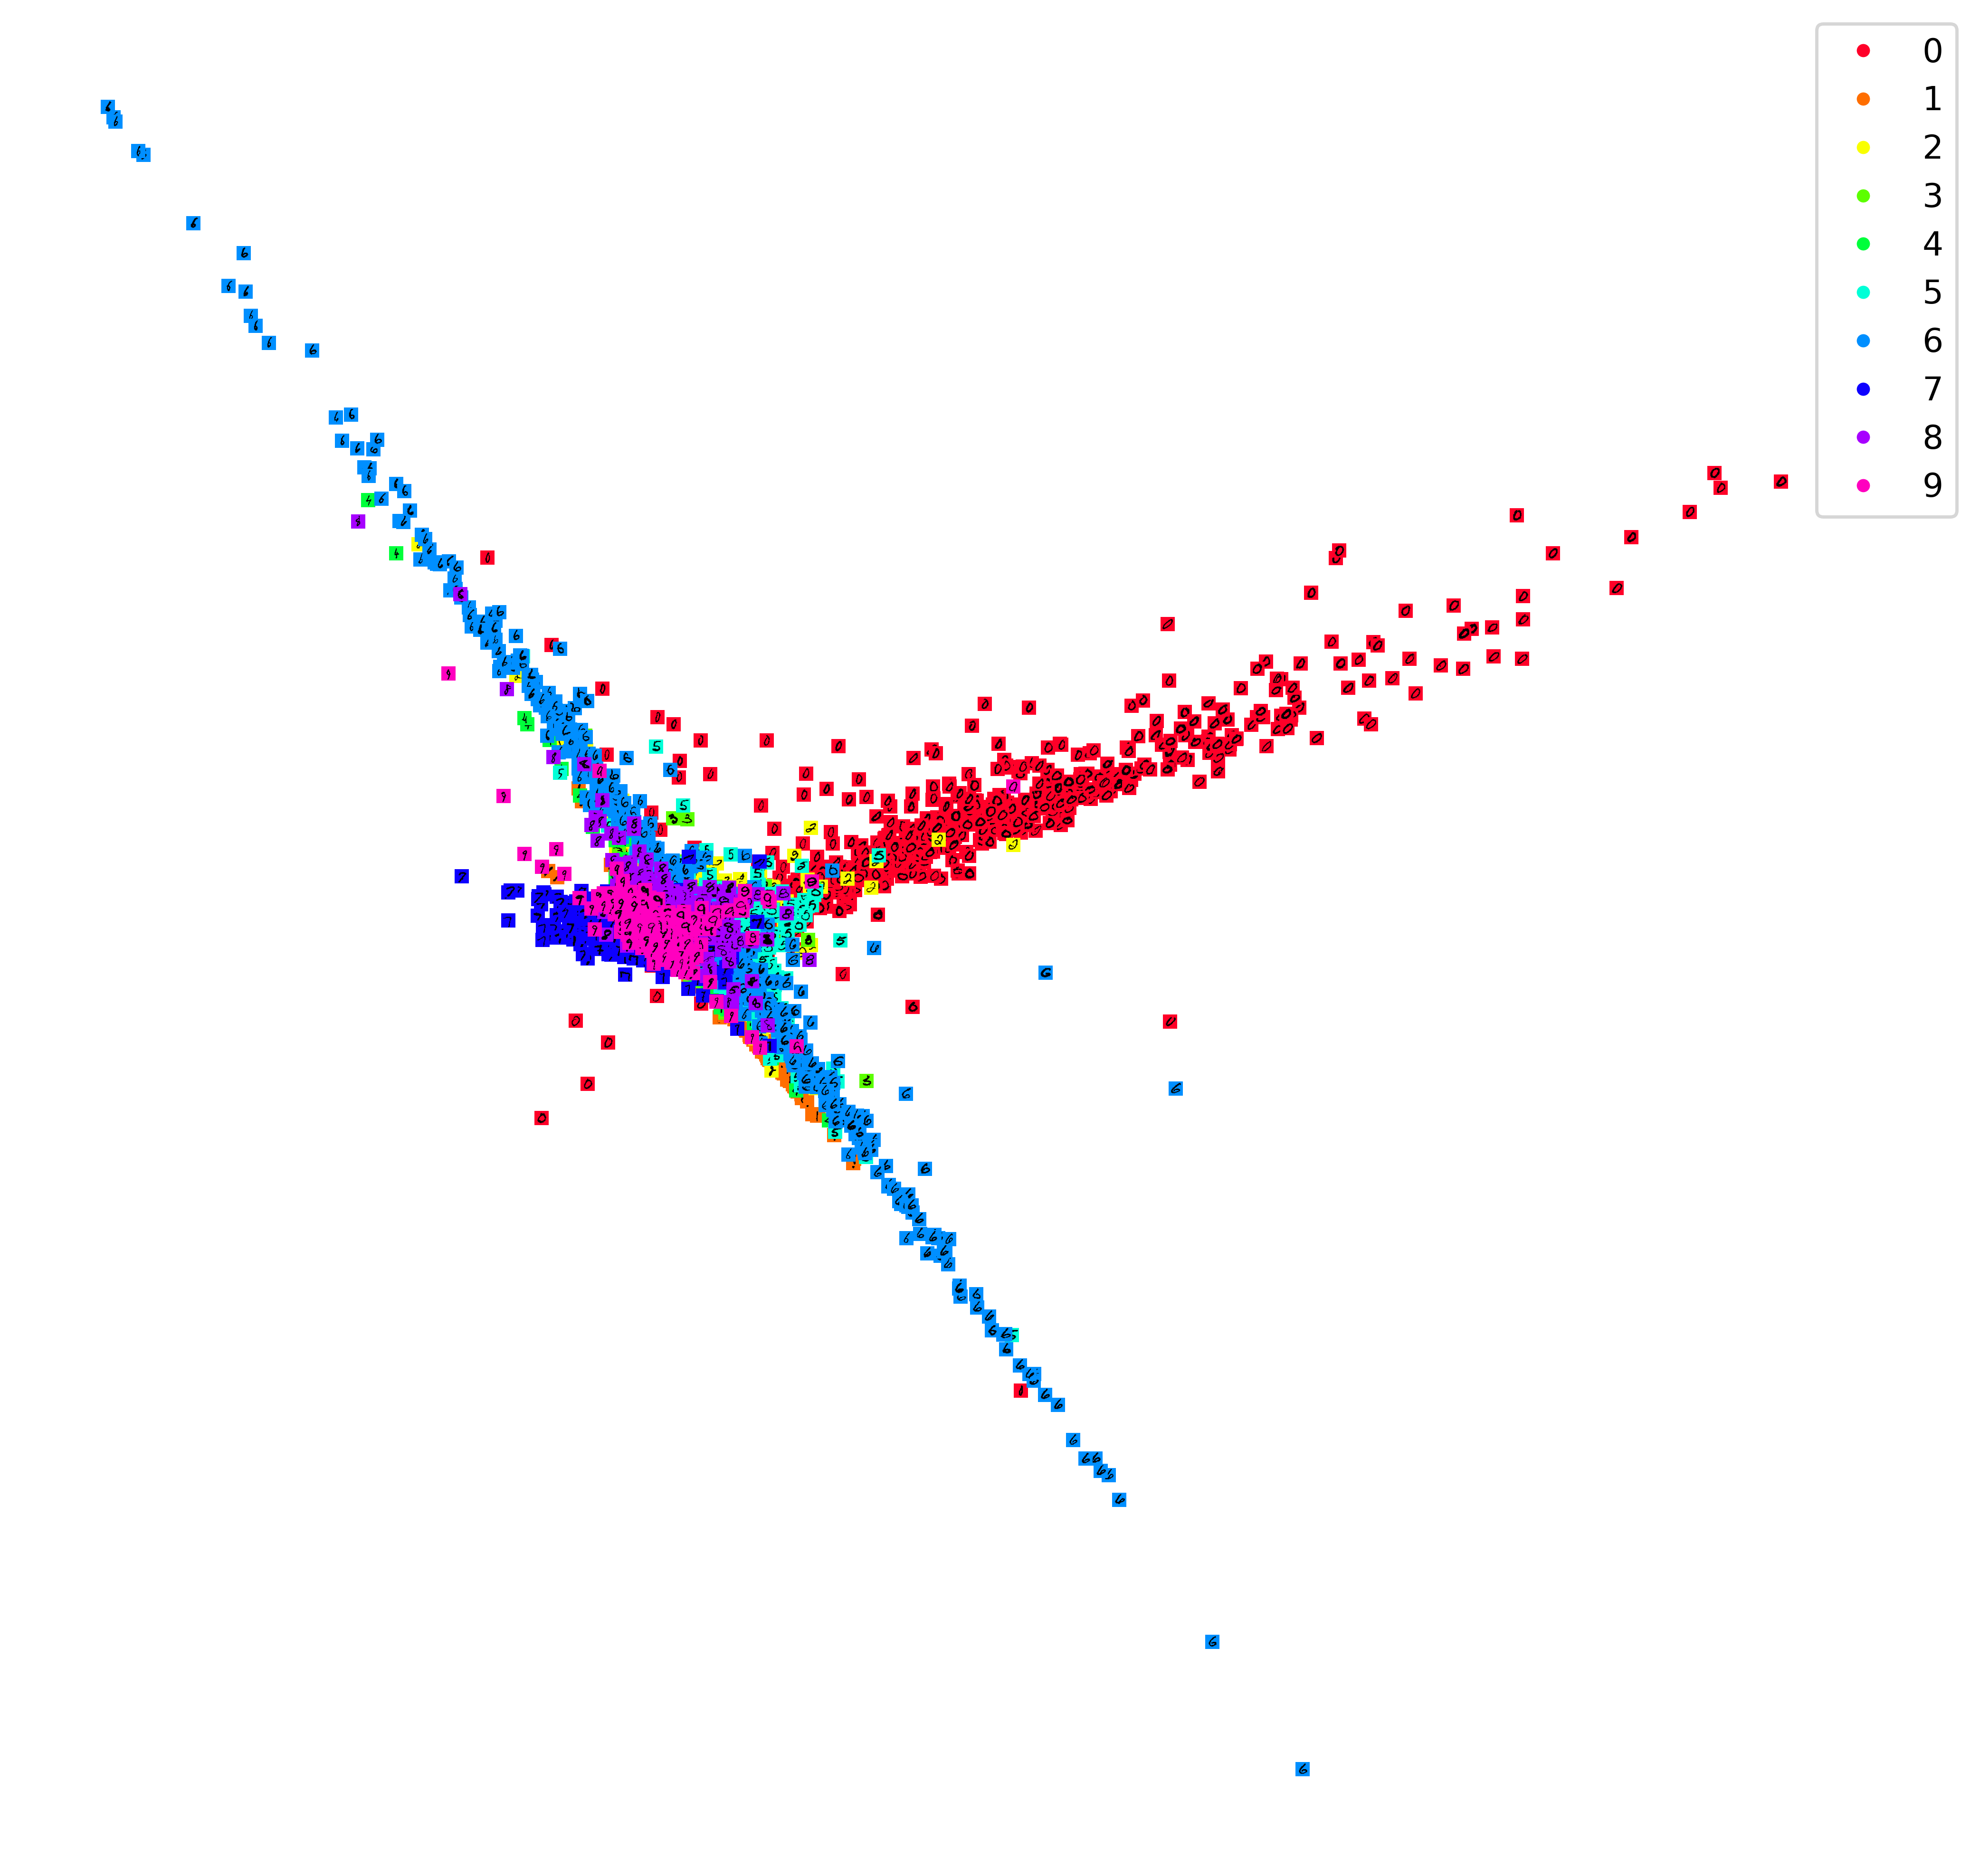

In [32]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=12)
X_mnist_lle = lle.fit_transform(X_mnist_pca)

#plot_2d_visualization(X_lle, y_subset, figsize=(10, 10))
plot_imgs_on_points(X_mnist_subset, X_mnist_lle, y_mnist_subset, figsize=(10, 10), dpi=500)

epoch = 1 : E = 0.1761028435
epoch = 2 : E = 0.1748222307
epoch = 3 : E = 0.1672069004
epoch = 4 : E = 0.1666967054
epoch = 5 : E = 0.1618659015
epoch = 6 : E = 0.1616724126
epoch = 7 : E = 0.1584250669
epoch = 8 : E = 0.1581593793
epoch = 9 : E = 0.1528786358
epoch = 10 : E = 0.1528246641


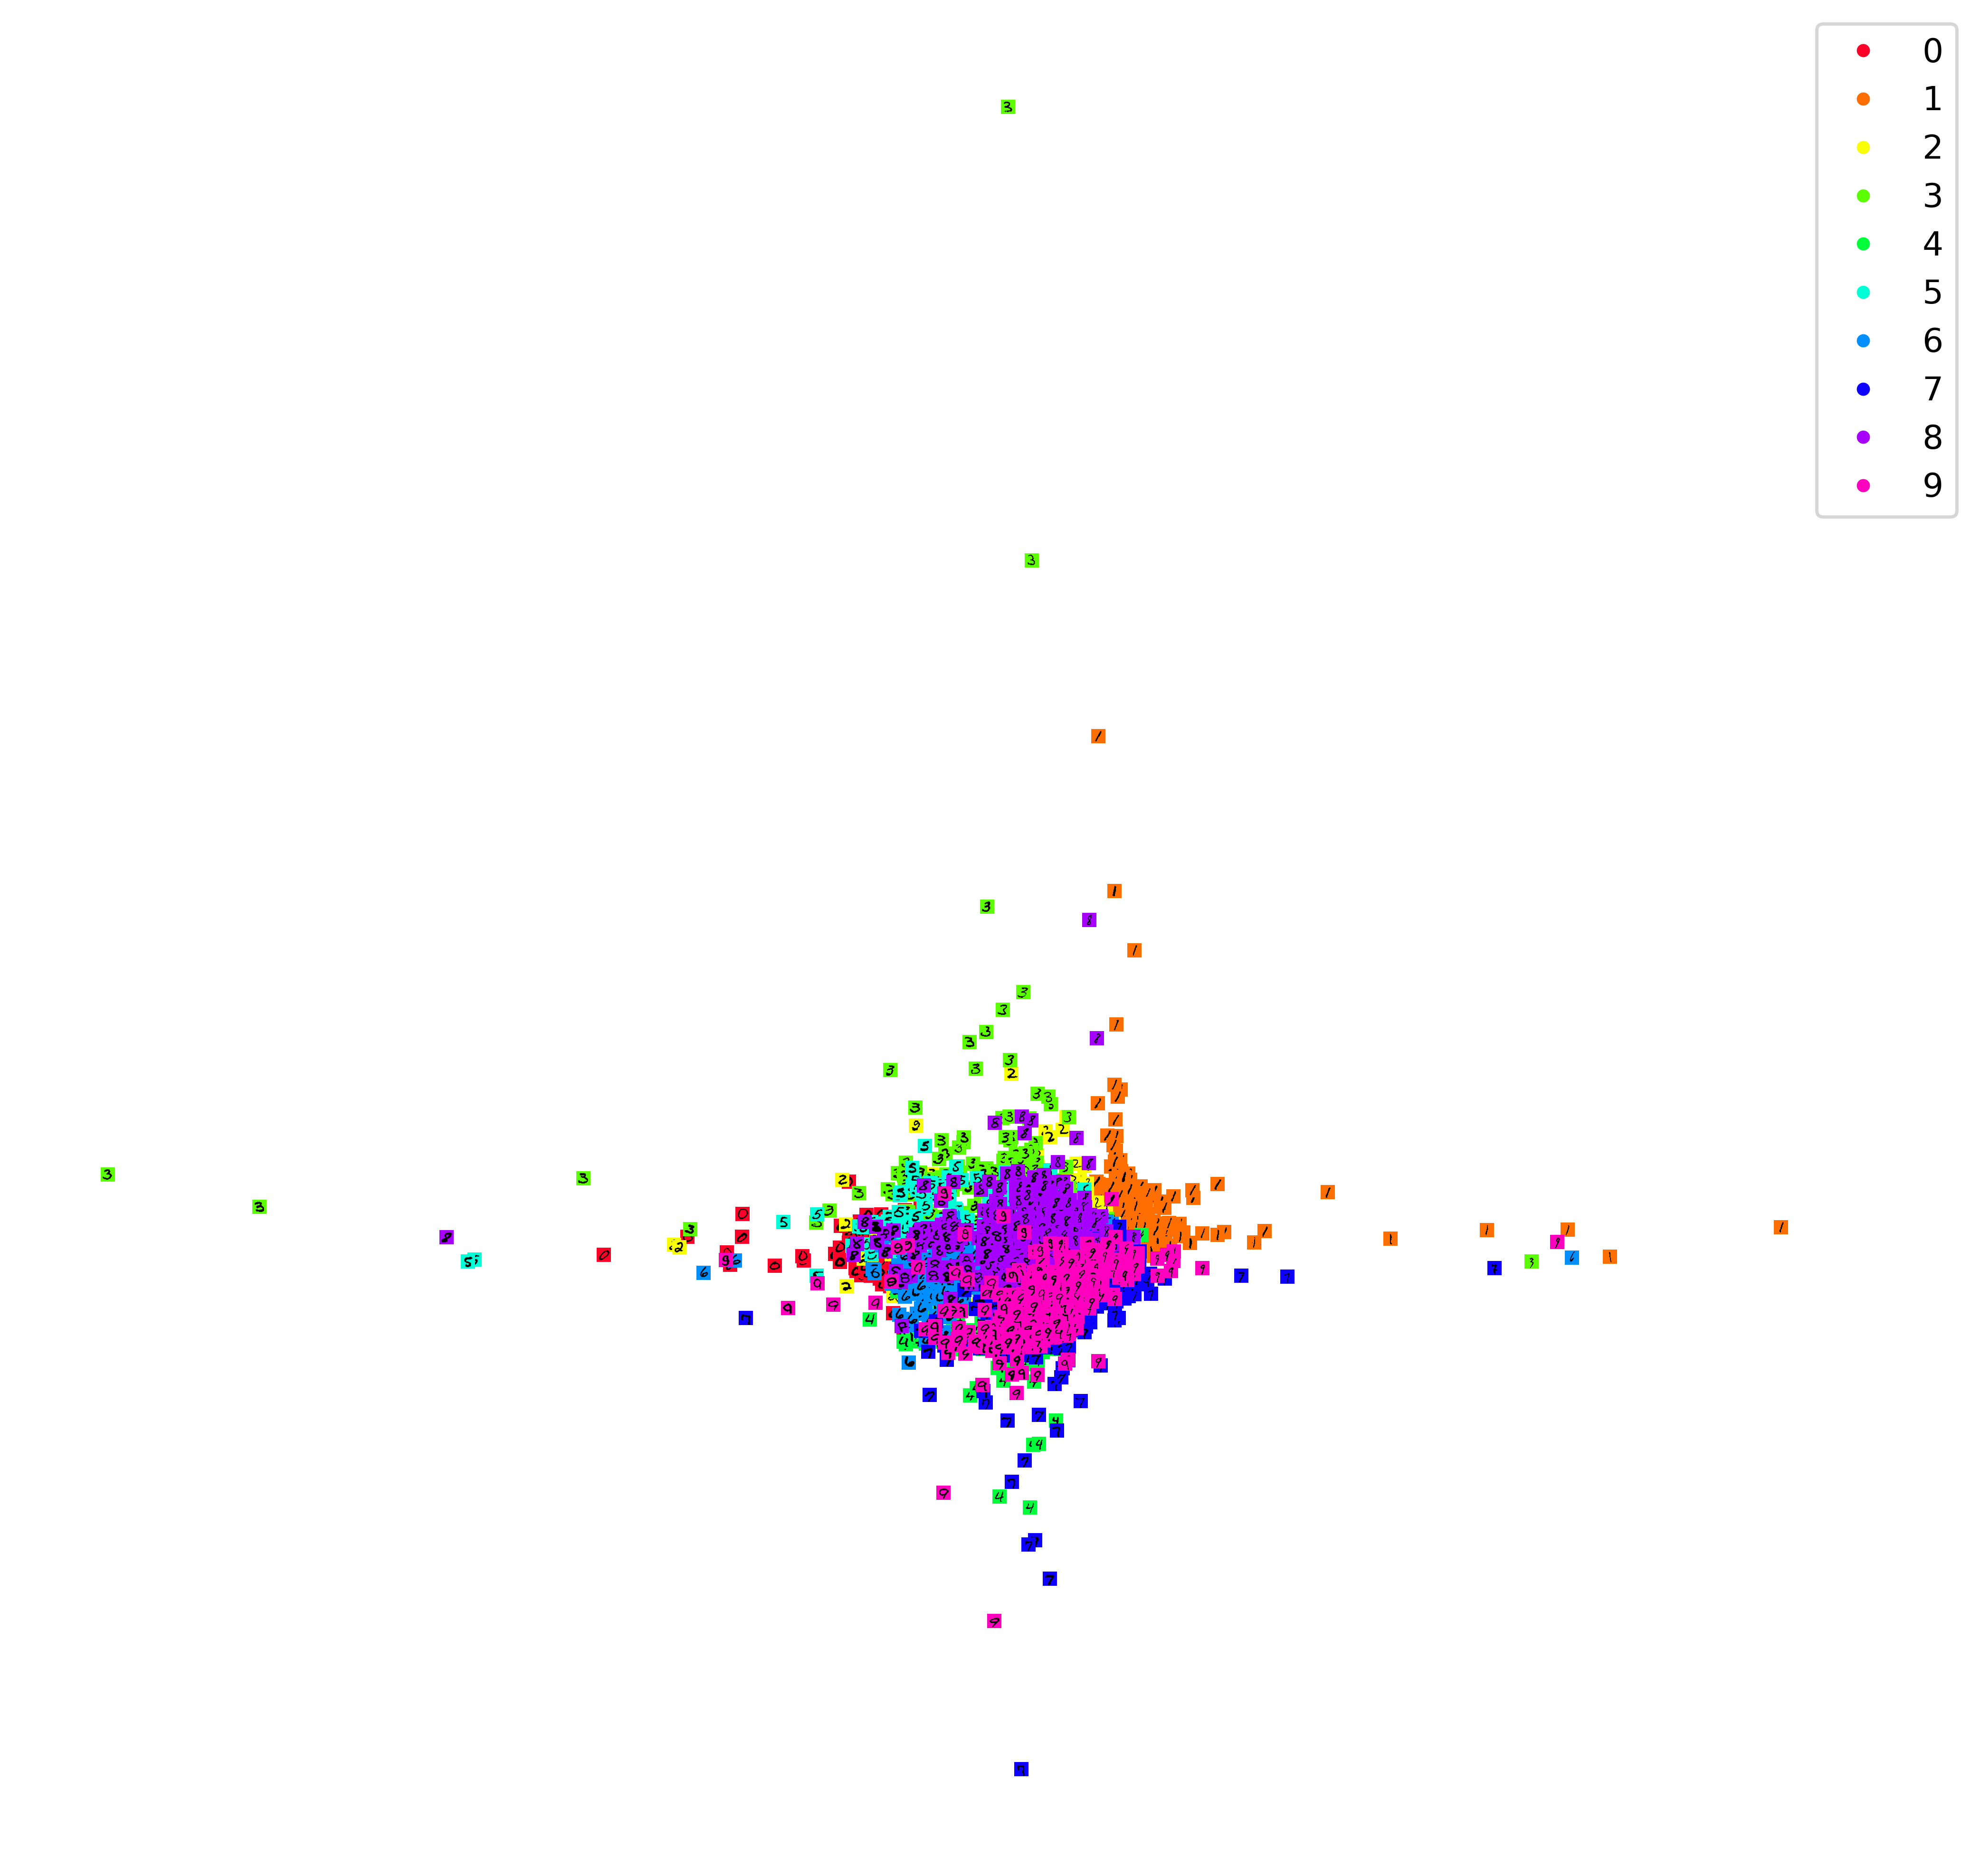

In [33]:
X_mnist_sammon, _ = sammon(X_mnist_pca, 2, maxiter=10, maxhalves=20)

#plot_2d_visualization(X_sammon, y_subset, figsize=(10, 10))
plot_imgs_on_points(X_mnist_subset, X_mnist_sammon, y_mnist_subset, figsize=(10, 10), dpi=500)

## Olivetti Faces

In [12]:
X_orl, y_orl = load_data('orl', save_if_not_found=True)
X_orl = X_orl.reshape(X_orl.shape[0], -1)
pca_orl = PCA(n_components=30)
X_orl_pca = pca_orl.fit_transform(X_orl)

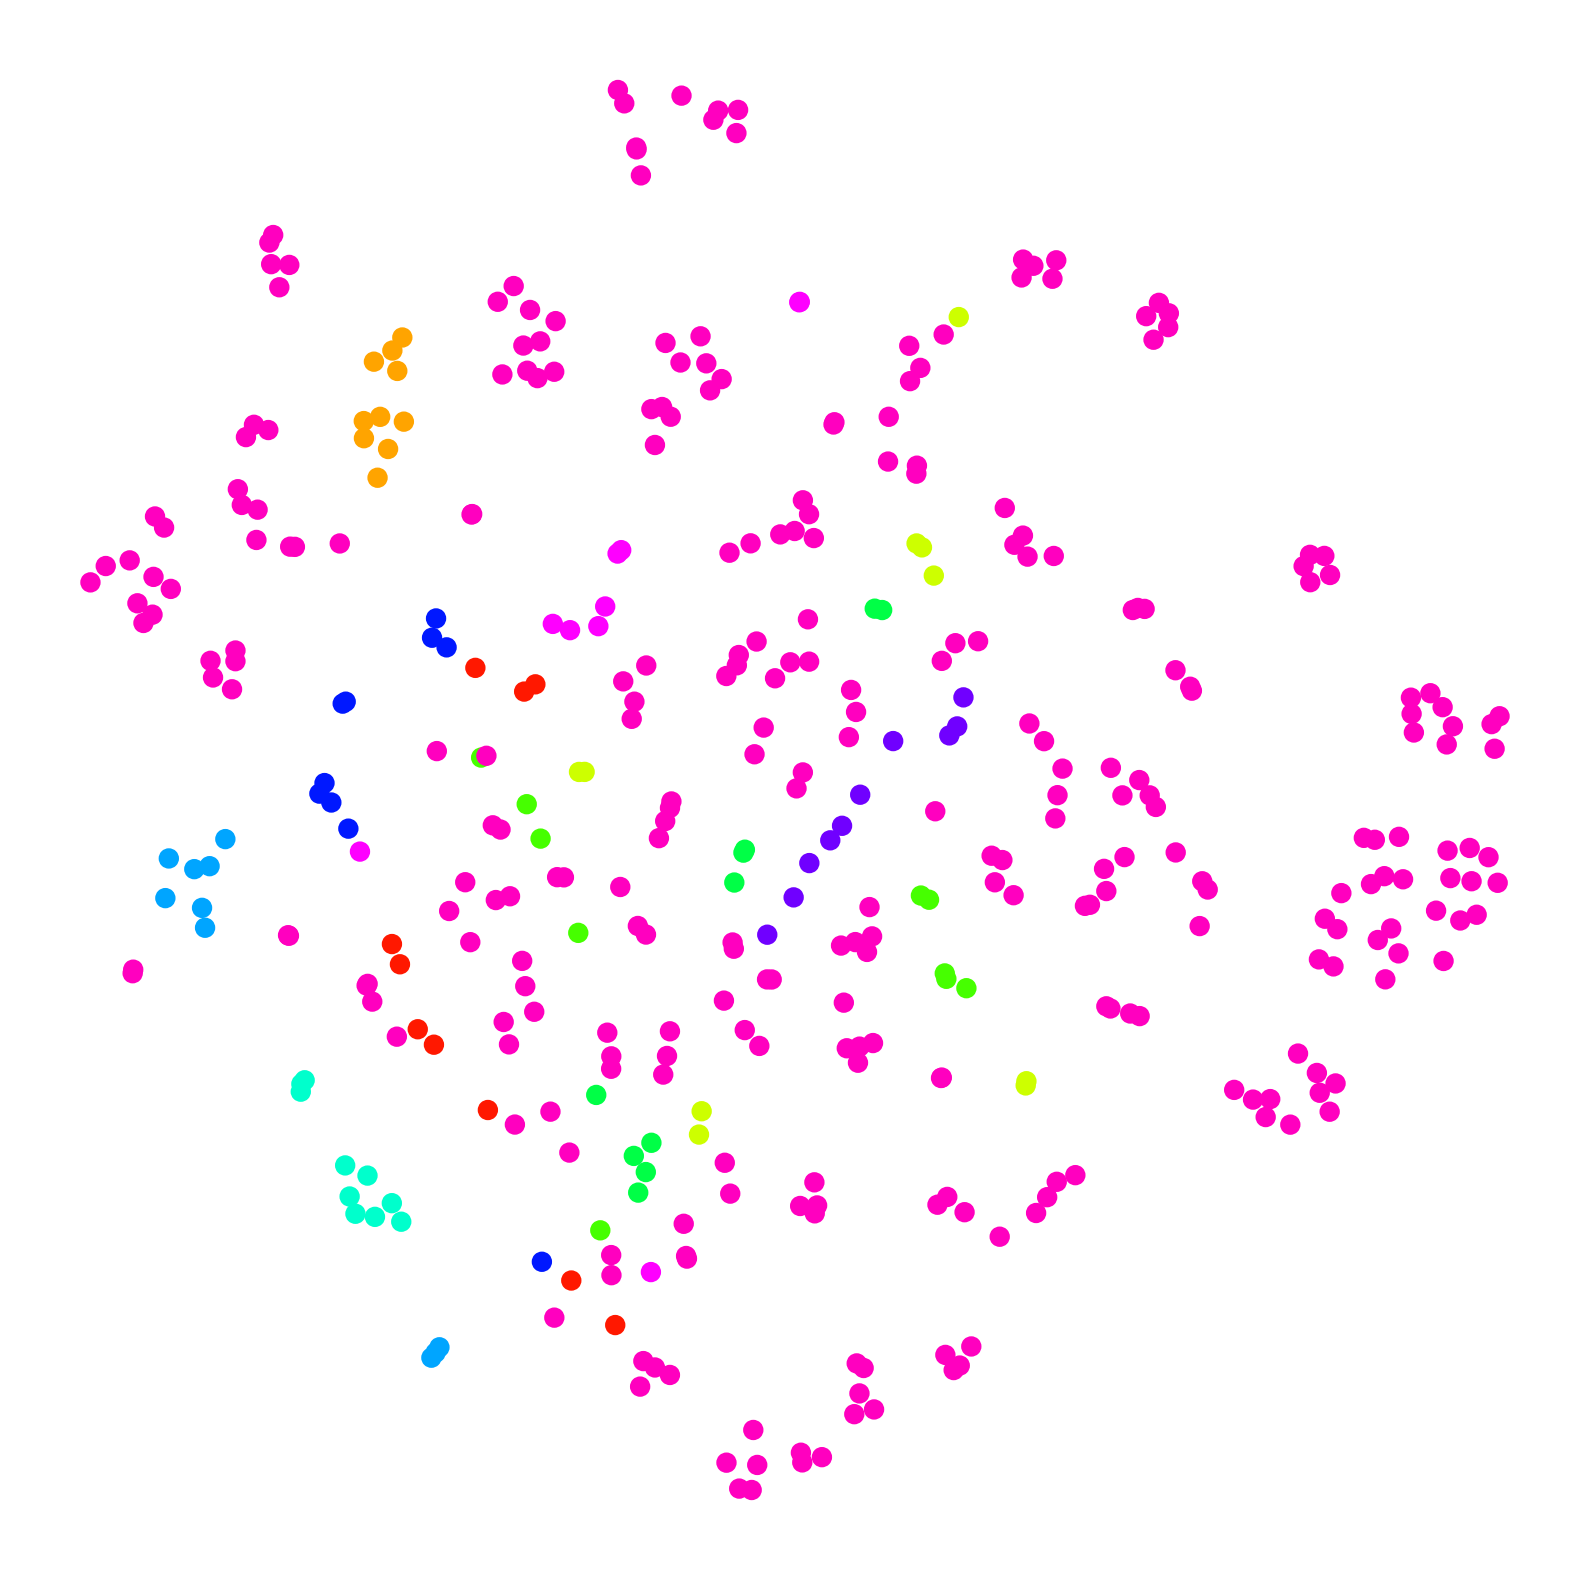

In [14]:
tsne = TSNE(n_components=2, perplexity=40)
X_orl_tsne = tsne.fit_transform(X_orl_pca)

plot_2d_visualization(X_orl_tsne, y_orl, s=40, figsize=(10, 10), legend=False, dpi=200)
#plot_imgs_on_points(X_orl, X_orl_tsne, y_orl, img_shape=(92, 112), s=20, figsize=(10, 10), dpi=500, legend=False)

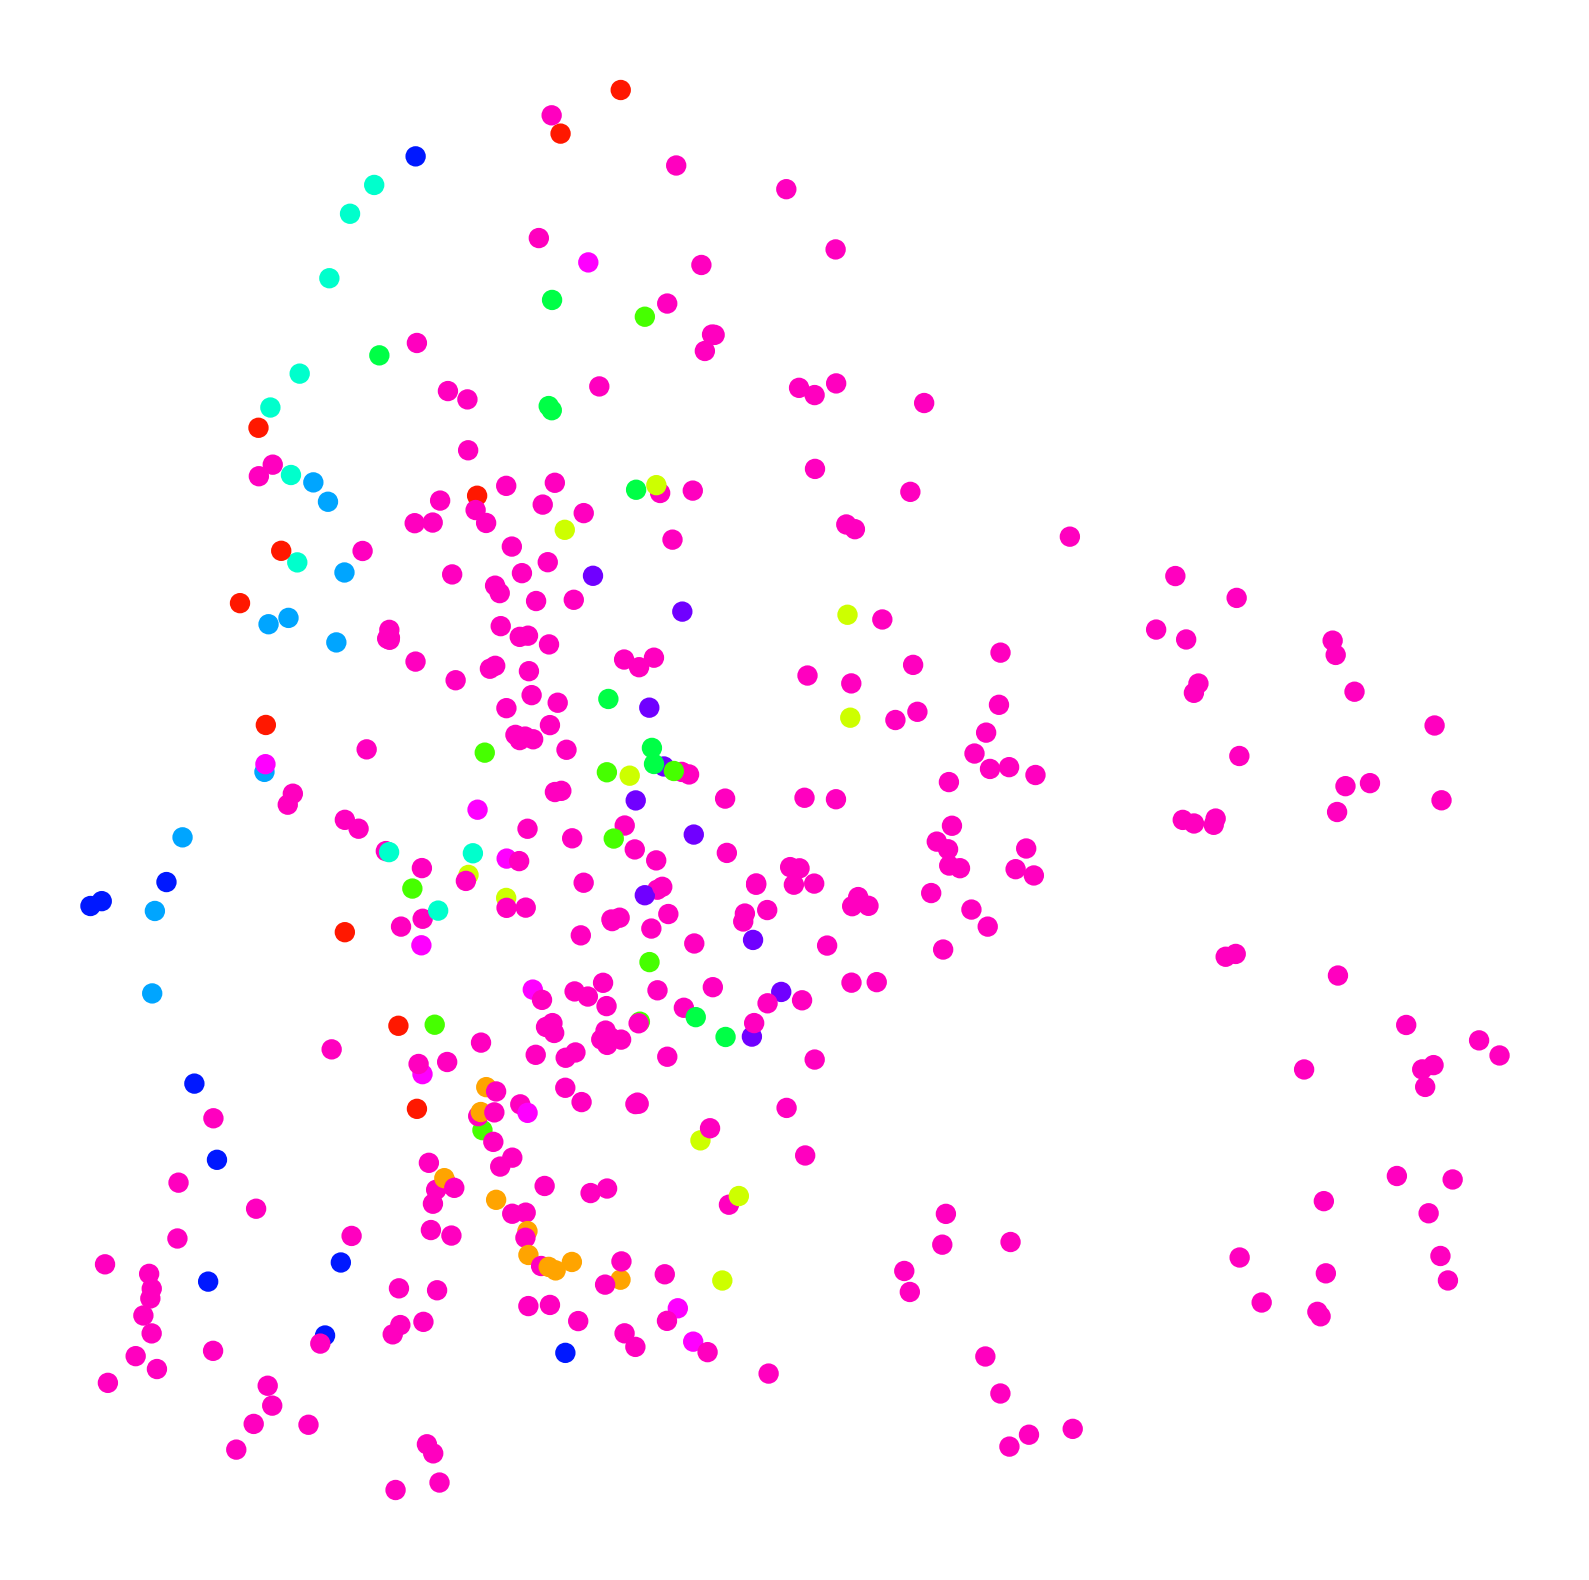

In [15]:
isomap = Isomap(n_components=2, n_neighbors=12)
X_orl_isomap = isomap.fit_transform(X_orl_pca)

plot_2d_visualization(X_orl_isomap, y_orl, s=40, figsize=(10, 10), legend=False, dpi=200)
#plot_imgs_on_points(X_orl, X_orl_isomap, y_orl, img_shape=(92, 112), s=40, figsize=(10, 10), dpi=500, legend=False)

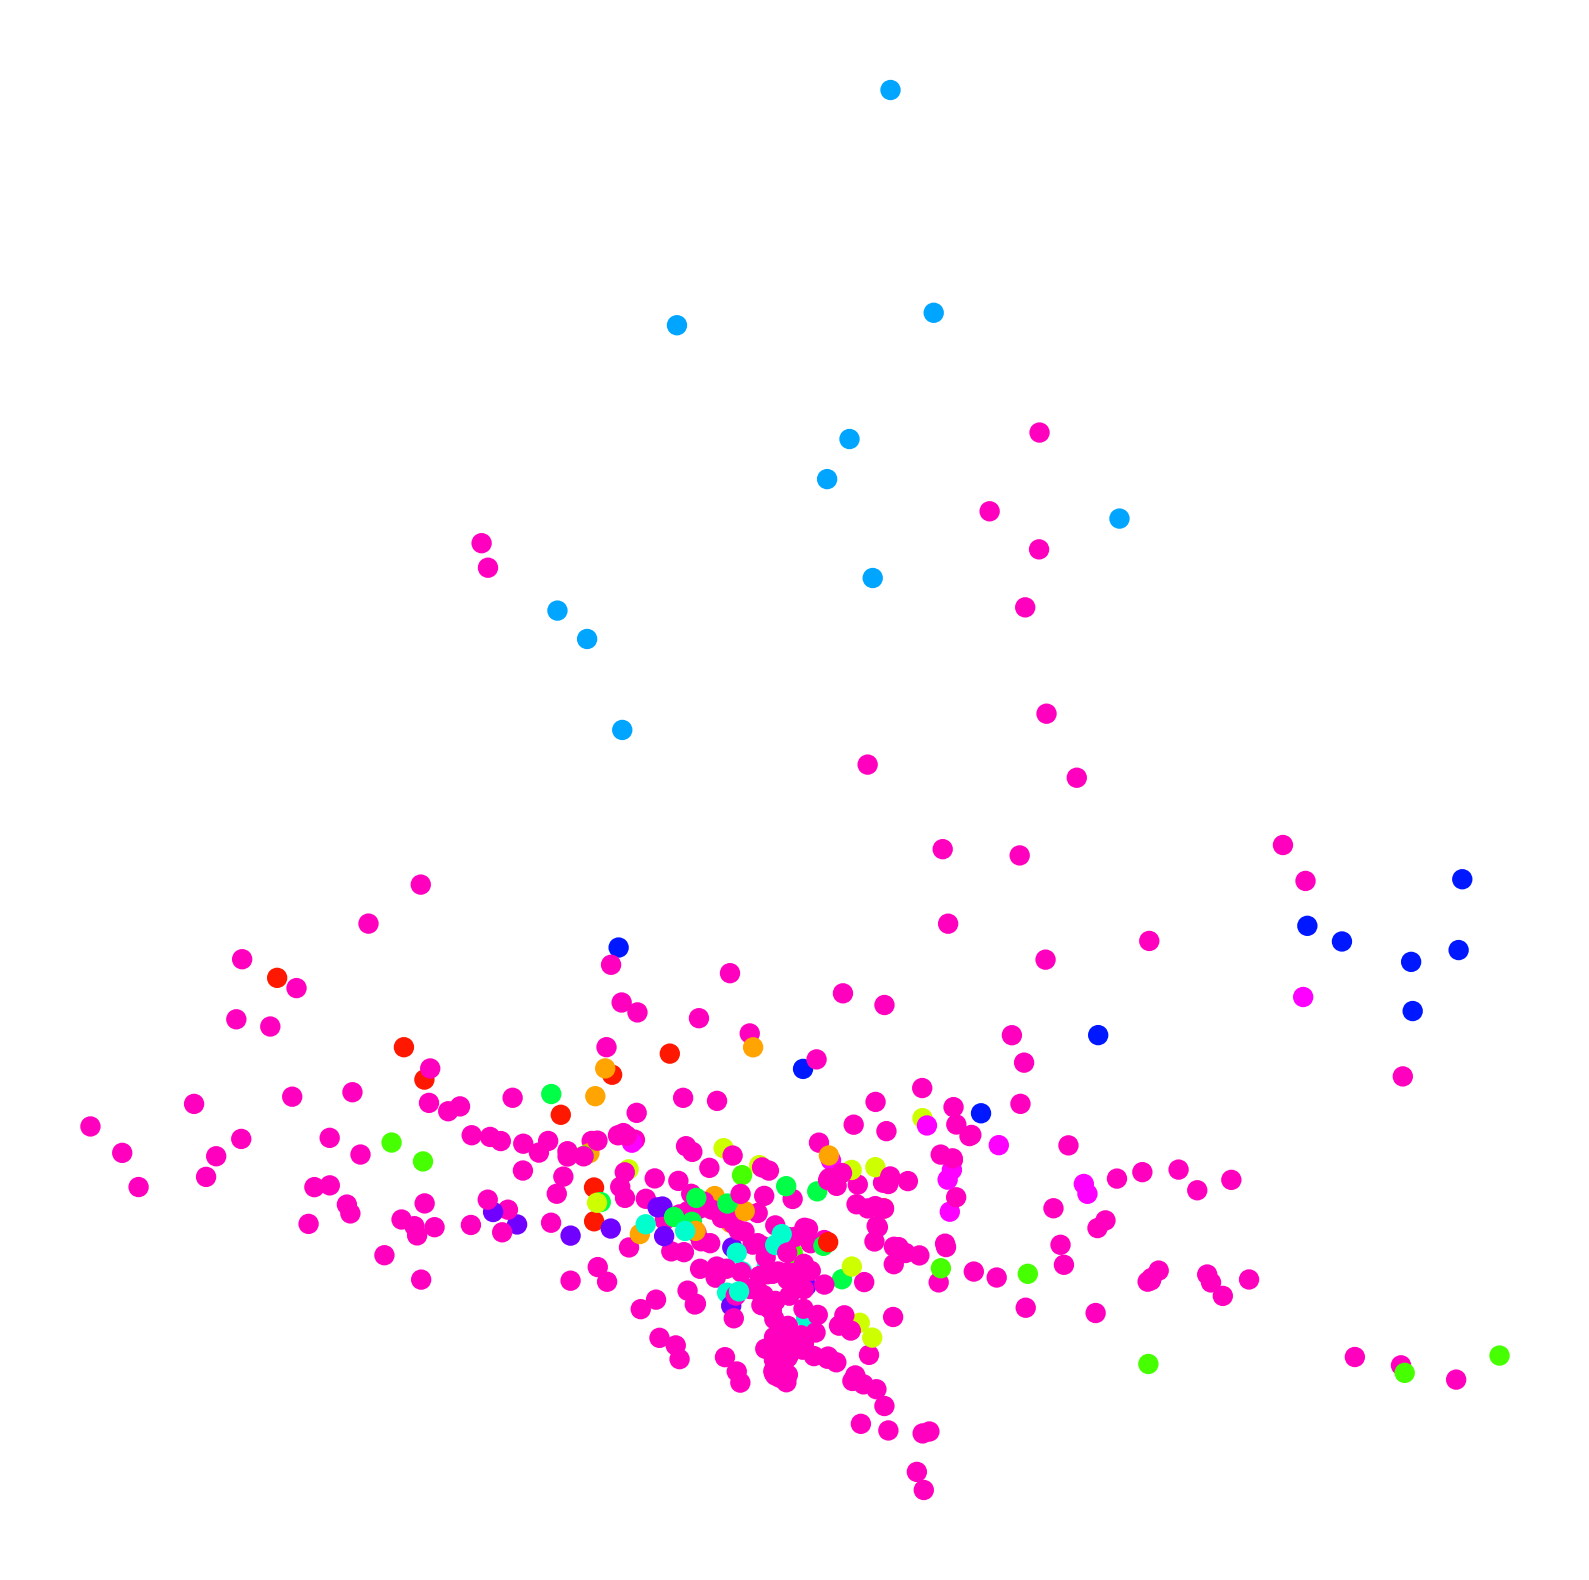

In [16]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=12)
X_orl_lle = lle.fit_transform(X_orl_pca)

plot_2d_visualization(X_orl_lle, y_orl, s=40, figsize=(10, 10), legend=False, dpi=200)
#plot_imgs_on_points(X_orl, X_orl_lle, y_orl, img_shape=(92, 112), s=40, figsize=(10, 10), dpi=500, legend=False)

epoch = 1 : E = 0.0926666116
epoch = 2 : E = 0.0865073499
epoch = 3 : E = 0.0844978966
epoch = 4 : E = 0.0839577314
epoch = 5 : E = 0.0837326804
epoch = 6 : E = 0.0770189682
epoch = 7 : E = 0.0769115767
epoch = 8 : E = 0.0764870459
epoch = 9 : E = 0.0751520566
epoch = 10 : E = 0.0748945191


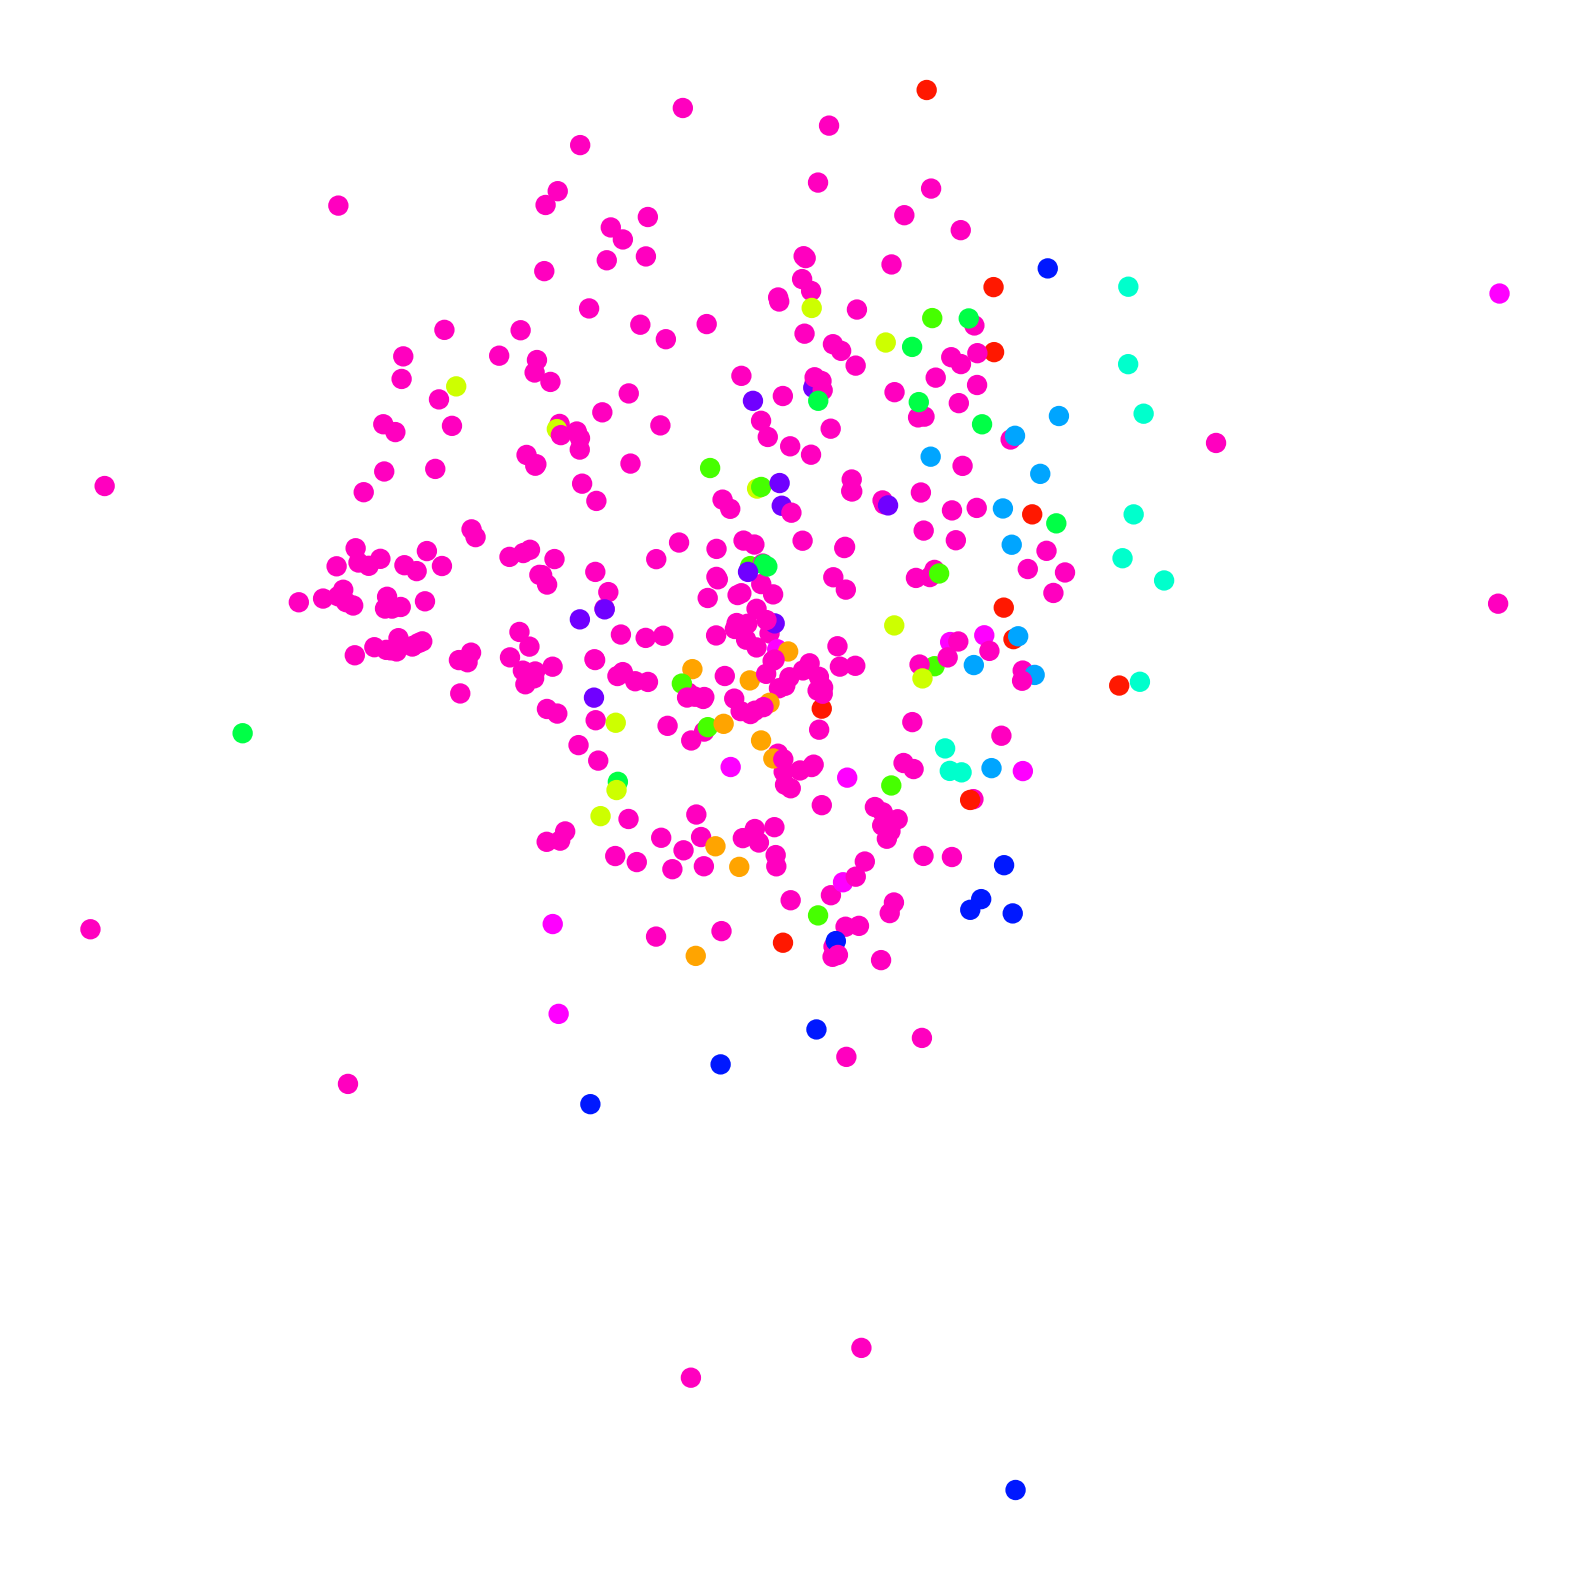

In [17]:
X_orl_sammon, _ = sammon(X_orl_pca, 2, maxiter=10, maxhalves=20)

plot_2d_visualization(X_orl_sammon, y_orl, s=40, figsize=(10, 10), legend=False, dpi=200)
#plot_imgs_on_points(X_orl, X_orl_sammon, y_orl, img_shape=(92, 112), s=40, figsize=(10, 10), dpi=500, legend=False)

## COIL-20

In [19]:
X_coil, y_coil = load_data('coil20', save_if_not_found=True)
X_coil = X_coil.reshape(X_coil.shape[0], -1)
pca_coil = PCA(n_components=30)

X_coil_pca = pca_coil.fit_transform(X_coil)

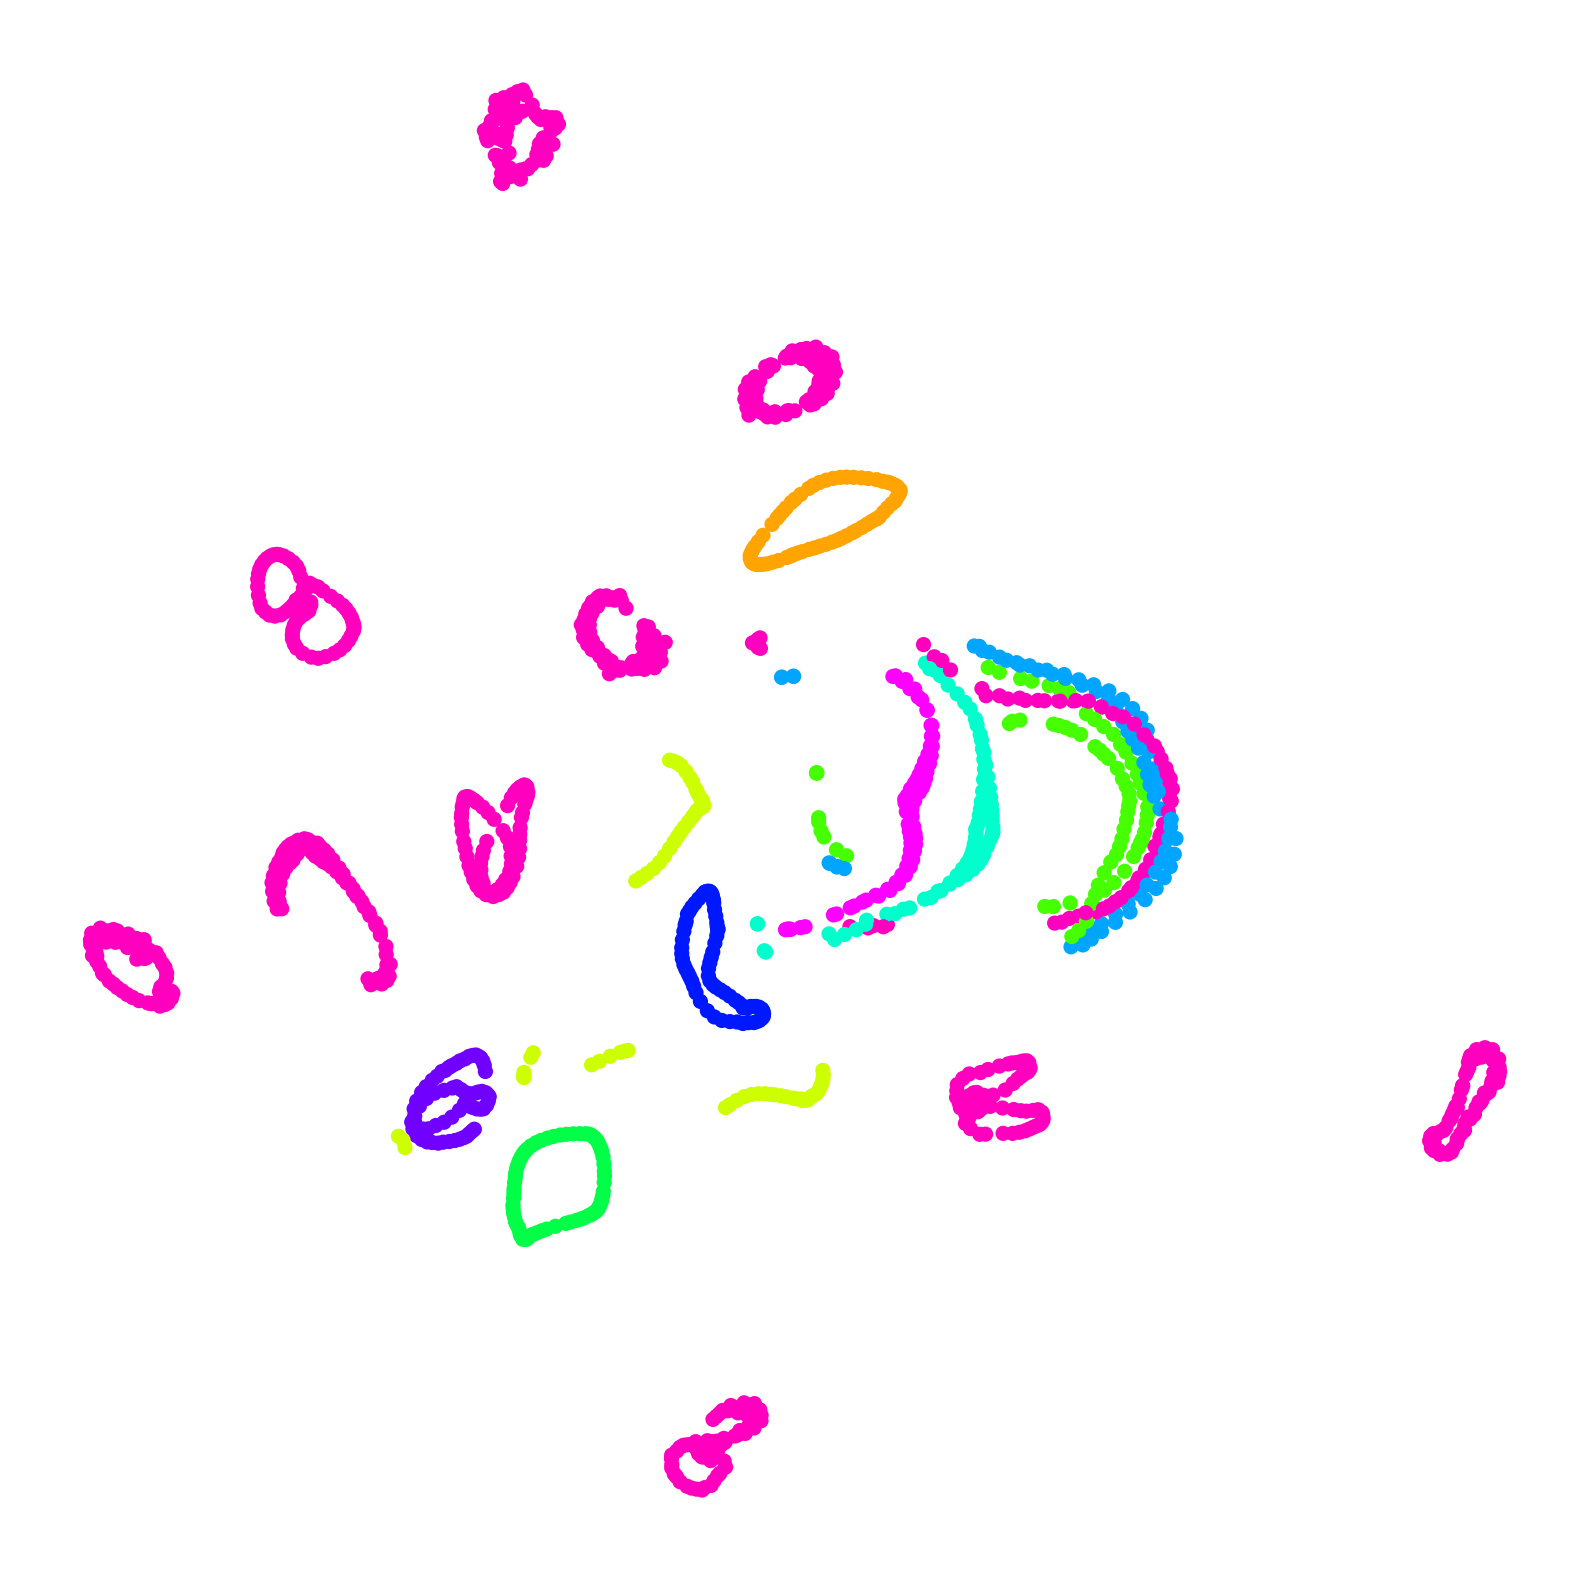

In [20]:
tsne = TSNE(n_components=2, perplexity=40)
X_coil_tsne = tsne.fit_transform(X_coil_pca)

plot_2d_visualization(X_coil_tsne, y_coil, s=20, figsize=(10, 10), legend=False, dpi=200)
#plot_imgs_on_points(X_coil, X_coil_tsne, y_coil, img_shape=(32, 32), s=20, figsize=(10, 10), dpi=500, legend=False)

/Users/jantiegges/.pyenv/versions/3.11.5/envs/a4-comp551/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 5 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/jantiegges/.pyenv/versions/3.11.5/envs/a4-comp551/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/jantiegges/.pyenv/versions/3.11.5/envs/a4-comp551/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/jantiegges/.pyenv/versions/3.11.5/envs/a4-comp551/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficie

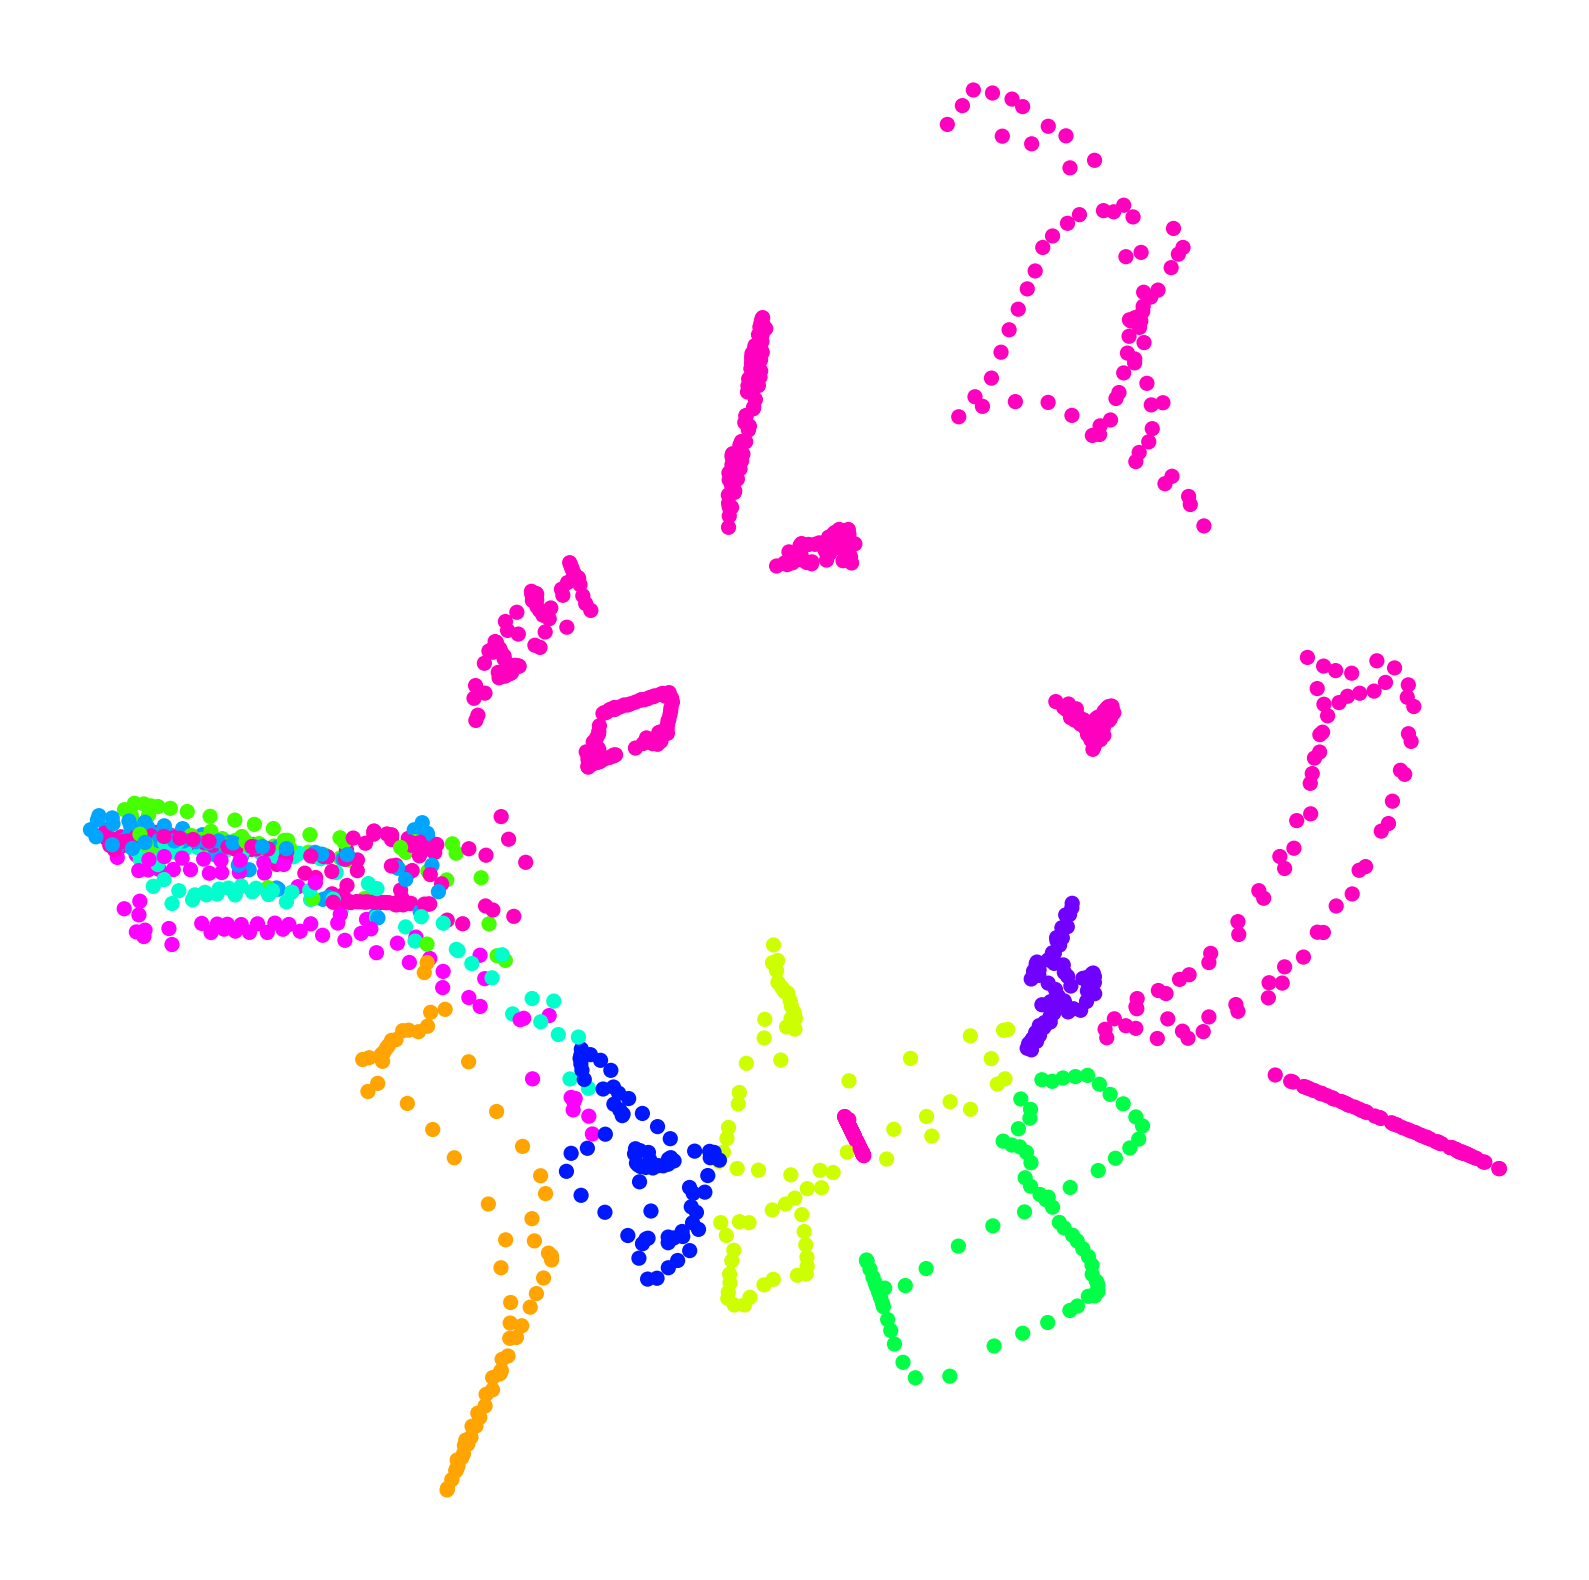

In [21]:
isomap = Isomap(n_components=2, n_neighbors=12)
X_coil_isomap = isomap.fit_transform(X_coil_pca)

plot_2d_visualization(X_coil_isomap, y_coil, s=20, figsize=(10, 10), legend=False, dpi=200)
#plot_imgs_on_points(X_coil, X_coil_isomap, y_coil, img_shape=(32, 32), s=20, figsize=(10, 10), dpi=500, legend=False)

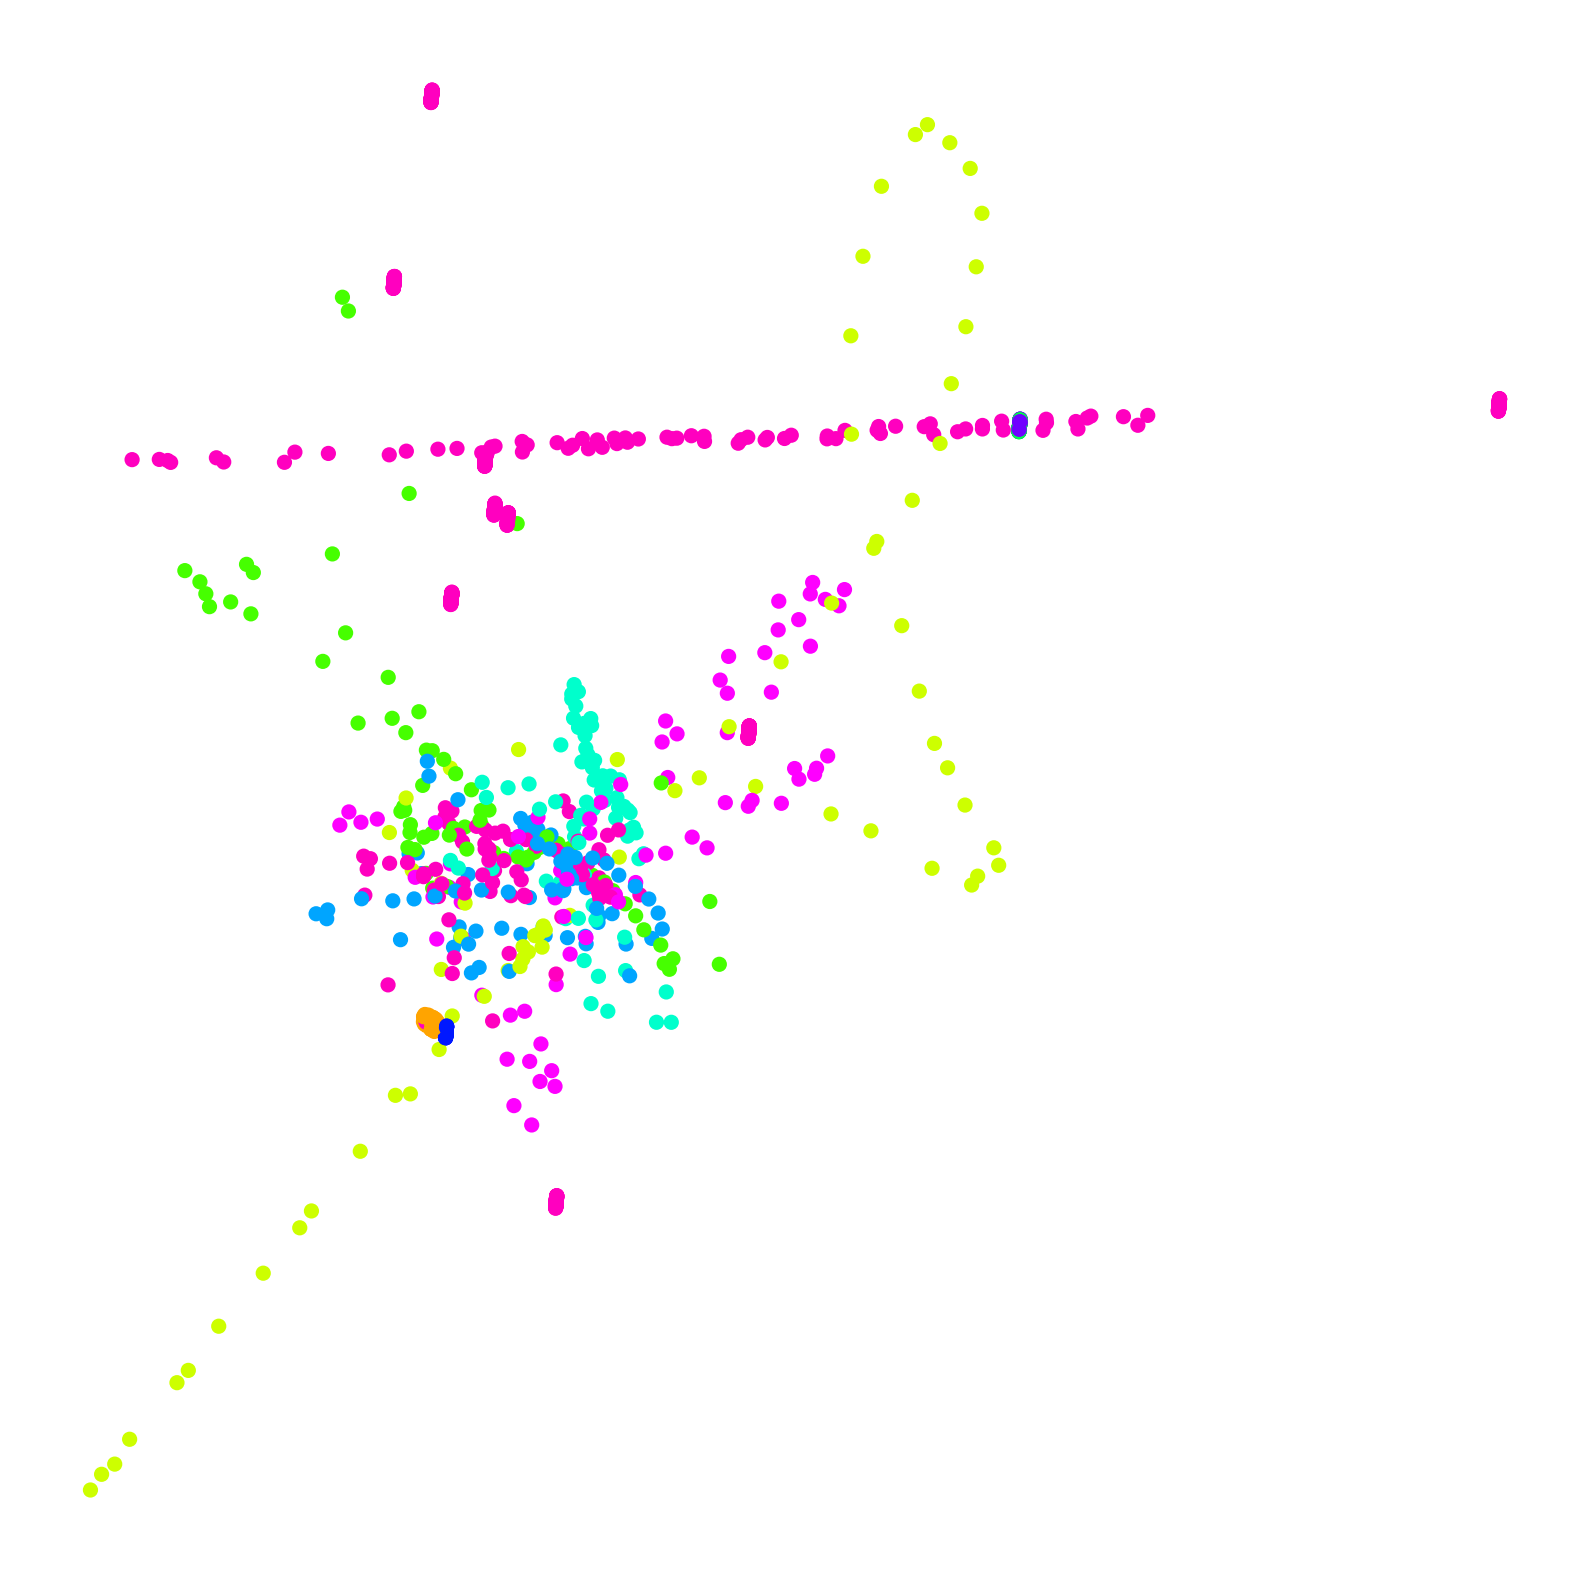

In [27]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=12)
X_coil_lle = lle.fit_transform(X_coil_pca)

plot_2d_visualization(X_coil_lle, y_coil, s=20, figsize=(10, 10), legend=False, dpi=200)
#plot_imgs_on_points(X_coil, X_coil_lle, y_coil, img_shape=(32, 32), s=20, figsize=(10, 10), dpi=500, legend=False)

# Ablation Study 1: Perplexity for t-SNE

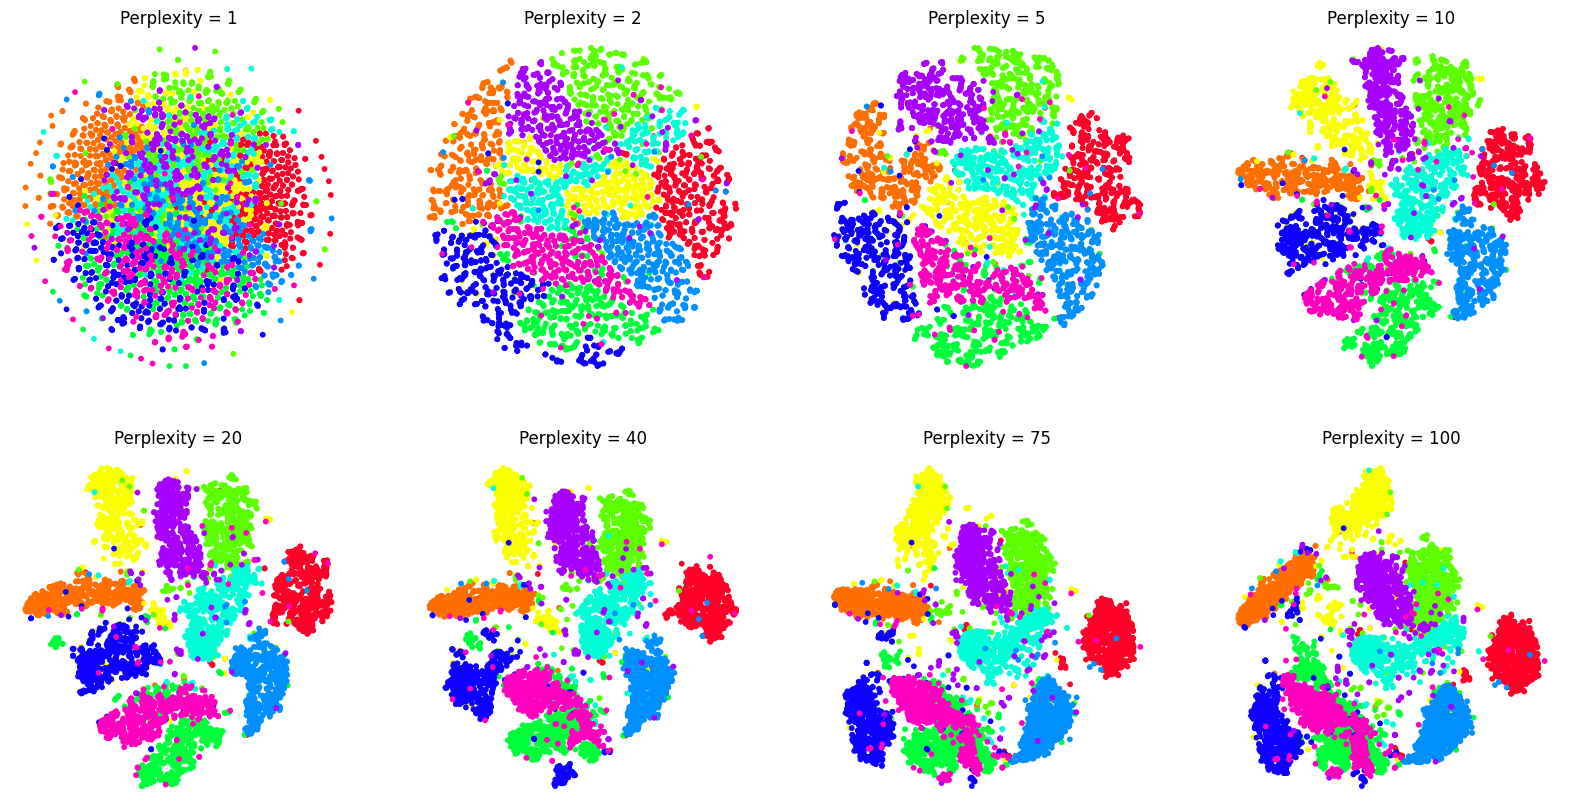

In [24]:
perplexities = [1, 2, 5, 10, 20, 40, 75, 100]

X_tsne_list = []
titles = []

for perplexity in perplexities:
    tsne_p = TSNE(n_components=2, perplexity=perplexity)
    X_tsne_list.append(tsne_p.fit_transform(X_mnist_pca))
    titles.append('Perplexity = {}'.format(perplexity))

plot_size = [2, 4]
plot_multiple_2d_visualizations(X_tsne_list, y_mnist_subset, titles, plot_size, legend=False)
    

# Ablation Study 2: Performance of t-SNE embeddings for different classifiers

In [25]:
def train_and_evaluate(X_data, y_data, method='original', classifier='logistic', scale_data=False):
    # Scale the data if specified
    if scale_data:
        scaler = StandardScaler()
        X_data = scaler.fit_transform(X_data)
    
    # Select the appropriate classifier
    if classifier == 'logistic':
        clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=1000)
    elif classifier == 'knn-1':
        clf = KNeighborsClassifier(n_neighbors=1)
    elif classifier == 'knn-3':
        clf = KNeighborsClassifier(n_neighbors=3)
    elif classifier == 'knn-5':
        clf = KNeighborsClassifier(n_neighbors=5)
    elif classifier == 'random_forest':
        clf = RandomForestClassifier(random_state=0)
    else:
        raise ValueError(f"Invalid classifier: {classifier}")
    
    # Define the number of folds for cross-validation
    k_folds = 10
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=0)
    
    # Perform cross-validation
    accuracies = cross_val_score(clf, X_data, y_data, cv=kf, scoring='accuracy')
    
    # Return accuracy and generalization error
    return {'Method': method, 'Classifier': classifier, 'Average Accuracy': accuracies.mean(), 'Average Generalization Error': 1 - accuracies.mean()}

# Example usage and table creation:
results = []

# Iterate over methods, classifiers, and scaling options
for method, X_data in [('t-SNE', X_mnist_tsne), ('Isomap', X_mnist_isomap), ('LLE', X_mnist_lle), ('Sammon', X_mnist_sammon), ('PCA', X_mnist_pca), ('Original', X_mnist_subset)]:
    for classifier in ['logistic', 'knn-1', 'knn-3', 'knn-5', 'random_forest']:
        result = train_and_evaluate(X_data, y_mnist_subset, method=method, classifier=classifier, scale_data=True)
        results.append(result)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

In [40]:
# sort be generalization error for each classifier
results_df.sort_values(['Classifier', 'Average Generalization Error'], inplace=True)
print(results_df)

      Method     Classifier  Average Accuracy  Average Generalization Error
1      t-SNE          knn-1          0.954000                      0.046000
21       PCA          knn-1          0.945333                      0.054667
26  Original          knn-1          0.902000                      0.098000
11       LLE          knn-1          0.499000                      0.501000
6     Isomap          knn-1          0.409833                      0.590167
16    Sammon          knn-1          0.365667                      0.634333
2      t-SNE          knn-3          0.950000                      0.050000
22       PCA          knn-3          0.944500                      0.055500
27  Original          knn-3          0.904333                      0.095667
12       LLE          knn-3          0.539500                      0.460500
7     Isomap          knn-3          0.443833                      0.556167
17    Sammon          knn-3          0.390667                      0.609333
3      t-SNE